In [1]:
#Api Key : 88a7130f97404fab8a09a9ad1bd5c80b, r81hMkJ0rvEZW5ljHEsmFVcrMJLcesjDLezOdaLF,  6766ca528fd9d5.60150714

### Import Libraries & Settings

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:.5f}'.format

In [5]:
import psutil
free = psutil.virtual_memory().free / (1024.0 ** 3)
used = psutil.virtual_memory().used / (1024.0 ** 3)
total = psutil.virtual_memory().total / (1024.0 ** 3)
print(total,used,free)
print(psutil.virtual_memory().percent,'%')

15.676994323730469 11.36385726928711 4.313941955566406
72.5 %


In [4]:
import sys
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('Dense', 1704),
 ('Dropout', 1704),
 ('LSTM', 1704),
 ('Lasso', 1704),
 ('LinearRegression', 1704),
 ('MinMaxScaler', 1704),
 ('Ridge', 1704),
 ('SentimentIntensityAnalyzer', 1704),
 ('Sequential', 1704),
 ('mean_absolute_error', 160),
 ('mean_squared_error', 160),
 ('open', 160),
 ('r2_score', 160),
 ('train_test_split', 160),
 ('go', 72),
 ('mdates', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('px', 72),
 ('sns', 72),
 ('yf', 72),
 ('free', 24),
 ('total', 24),
 ('used', 24)]

In [7]:
from datetime import datetime

today_date = datetime.today().strftime('%Y-%m-%d')
nifty_data = yf.download('^NSEI', start='2022-01-01', end=today_date)
nifty_data.shape

[*********************100%***********************]  1 of 1 completed


(757, 5)

In [8]:
nifty_data

Price            Close        High         Low        Open   Volume
Ticker           ^NSEI       ^NSEI       ^NSEI       ^NSEI    ^NSEI
Date                                                               
2022-01-03 17625.69922 17646.65039 17383.30078 17387.15039   200500
2022-01-04 17805.25000 17827.59961 17593.55078 17681.40039   247400
2022-01-05 17925.25000 17944.69922 17748.84961 17820.09961   251500
2022-01-06 17745.90039 17797.94922 17655.55078 17768.50000   236500
2022-01-07 17812.69922 17905.00000 17704.55078 17797.59961   239300
2022-01-10 18003.30078 18017.44922 17879.15039 17913.30078   232400
2022-01-11 18055.75000 18081.25000 17964.40039 17997.75000   220200
2022-01-12 18212.34961 18227.94922 18128.80078 18170.40039   245000
2022-01-13 18257.80078 18272.25000 18163.80078 18257.00000   303700
2022-01-14 18255.75000 18286.94922 18119.65039 18185.00000   229500
2022-01-17 18308.09961 18321.55078 18228.75000 18235.65039   266700
2022-01-18 18113.05078 18350.94922 18085.90039 18337.19922   227500
2022-01-19 17938.40039 18129.19922 17884.90039 18129.19922   276700
2022-01-20 17757.00000 17943.69922 17648.44922 17921.00000   258100
2022-01-21 17617.15039 17707.59961 17485.84961 17613.69922   277600
2022-01-24 17149.09961 17599.40039 16997.84961 17575.15039   323800
2022-01-25 17277.94922 17309.15039 16836.80078 17001.55078   326500
2022-01-27 17110.15039 17182.50000 16866.75000 17062.00000   395600
2022-01-28 17101.94922 17373.50000 17077.09961 17208.30078   355300
2022-01-31 17339.84961 17410.00000 17264.15039 17301.05078   321700
2022-02-01 17576.84961 17622.40039 17244.55078 17529.44922   386400
2022-02-02 17780.00000 17794.59961 17674.80078 17706.19922   271200
2022-02-03 17560.19922 17781.15039 17511.15039 17767.75000   226600
2022-02-04 17516.30078 17617.80078 17462.55078 17590.19922   261400
2022-02-07 17213.59961 17536.75000 17119.40039 17456.30078   265000
2022-02-08 17266.75000 17306.44922 17043.65039 17279.84961   268500
2022-02-09 17463.80078 17477.15039 17339.00000 17370.09961   236400
2022-02-10 17605.84961 17639.44922 17427.15039 17554.09961   273600
2022-02-11 17374.75000 17454.75000 17303.00000 17451.00000   253100
2022-02-14 16842.80078 17099.50000 16809.65039 17076.15039   305500
2022-02-15 17352.44922 17375.00000 16839.25000 16933.25000   298700
2022-02-16 17322.19922 17490.59961 17257.69922 17408.44922   244500
2022-02-17 17304.59961 17442.90039 17235.84961 17396.55078   232100
2022-02-18 17276.30078 17380.80078 17219.19922 17236.05078   189600
2022-02-21 17206.65039 17351.05078 17070.69922 17192.25000   215200
2022-02-22 17092.19922 17148.55078 16843.80078 16847.94922   300100
2022-02-23 17063.25000 17220.69922 17027.84961 17194.50000   200200
2022-02-24 16247.95020 16705.25000 16203.25000 16548.90039   458000
2022-02-25 16658.40039 16748.80078 16478.30078 16515.65039   329800
2022-02-28 16793.90039 16815.90039 16356.29980 16481.59961   404200
2022-03-02 16605.94922 16678.50000 16478.65039 16593.09961   517700
2022-03-03 16498.05078 16768.94922 16442.94922 16723.19922   442100
2022-03-04 16245.34961 16456.00000 16133.79980 16339.45020   456100
2022-03-07 15863.15039 15944.59961 15711.45020 15867.95020   585400
2022-03-08 16013.45020 16028.75000 15671.45020 15747.75000   543600
2022-03-09 16345.34961 16418.05078 15990.00000 16078.00000   462200
2022-03-10 16594.90039 16757.30078 16447.90039 16757.09961   486400
2022-03-11 16630.44922 16694.40039 16470.90039 16528.80078   343700
2022-03-14 16871.30078 16887.94922 16606.50000 16633.69922   314700
2022-03-15 16663.00000 16927.75000 16555.00000 16900.65039   381600
2022-03-16 16975.34961 16987.90039 16837.84961 16876.65039   260000
2022-03-17 17287.05078 17344.59961 17175.75000 17202.90039   448300
2022-03-21 17117.59961 17353.34961 17096.40039 17329.50000   285500
2022-03-22 17315.50000 17334.40039 17006.30078 17120.40039   338300
2022-03-23 17245.65039 17442.40039 17199.59961 17405.05078   292100
2022-03-24 17222.75000 17291.75000 17091.15039 17094.949

In [9]:
nifty_data.reset_index(inplace=True)
nifty_data.columns = nifty_data.columns.droplevel(1)

In [10]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    757 non-null    datetime64[ns]
 1   Close   757 non-null    float64       
 2   High    757 non-null    float64       
 3   Low     757 non-null    float64       
 4   Open    757 non-null    float64       
 5   Volume  757 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.6 KB


### Exploratory Data Analysis

In [11]:
nifty_data.describe()

Price                           Date       Close        High         Low  \
count                            757   757.00000   757.00000   757.00000   
mean   2023-07-14 17:52:51.994715904 19958.66401 20055.94776 19855.35443   
min              2022-01-03 00:00:00 15293.50000 15382.50000 15183.40039   
25%              2022-10-07 00:00:00 17622.25000 17707.59961 17511.15039   
50%              2023-07-13 00:00:00 19253.80078 19345.09961 19223.65039   
75%              2024-04-23 00:00:00 22419.94922 22516.00000 22307.25000   
max              2025-01-24 00:00:00 26216.05078 26277.34961 26151.40039   
std                              NaN  2880.23311  2891.05015  2875.02084   

Price        Open        Volume  
count   757.00000     757.00000  
mean  19968.34902  284869.74901  
min   15272.65039       0.00000  
25%   17638.59961  230700.00000  
50%   19258.15039  266500.00000  
75%   22421.55078  317300.00000  
max   26248.25000 1006100.00000  
std    2884.43847   91670.95399

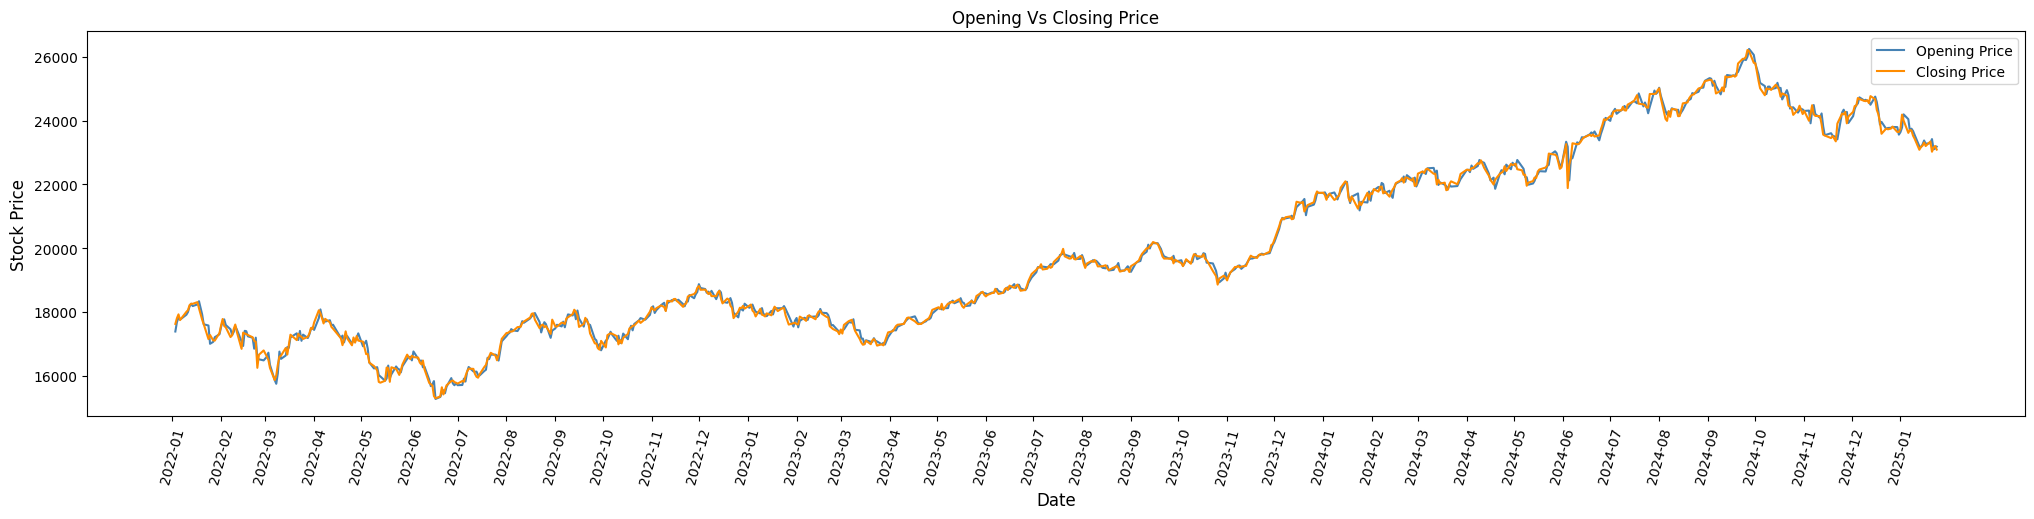

In [12]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')
#plt.plot(nifty_data['Date'], nifty_data['Open'])
#plt.plot(nifty_data['Date'], nifty_data['Close'])
sns.lineplot(x='Date', y='Open', data=nifty_data, color='steelblue', label='Opening Price')
sns.lineplot(x='Date', y='Close', data=nifty_data, color='darkorange', label='Closing Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(nifty_data['Date'].dt.strftime("%Y-%m").unique().astype('str'))
plt.xticks(rotation=75)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Opening Vs Closing Price', fontsize=12)
plt.legend()
plt.show()

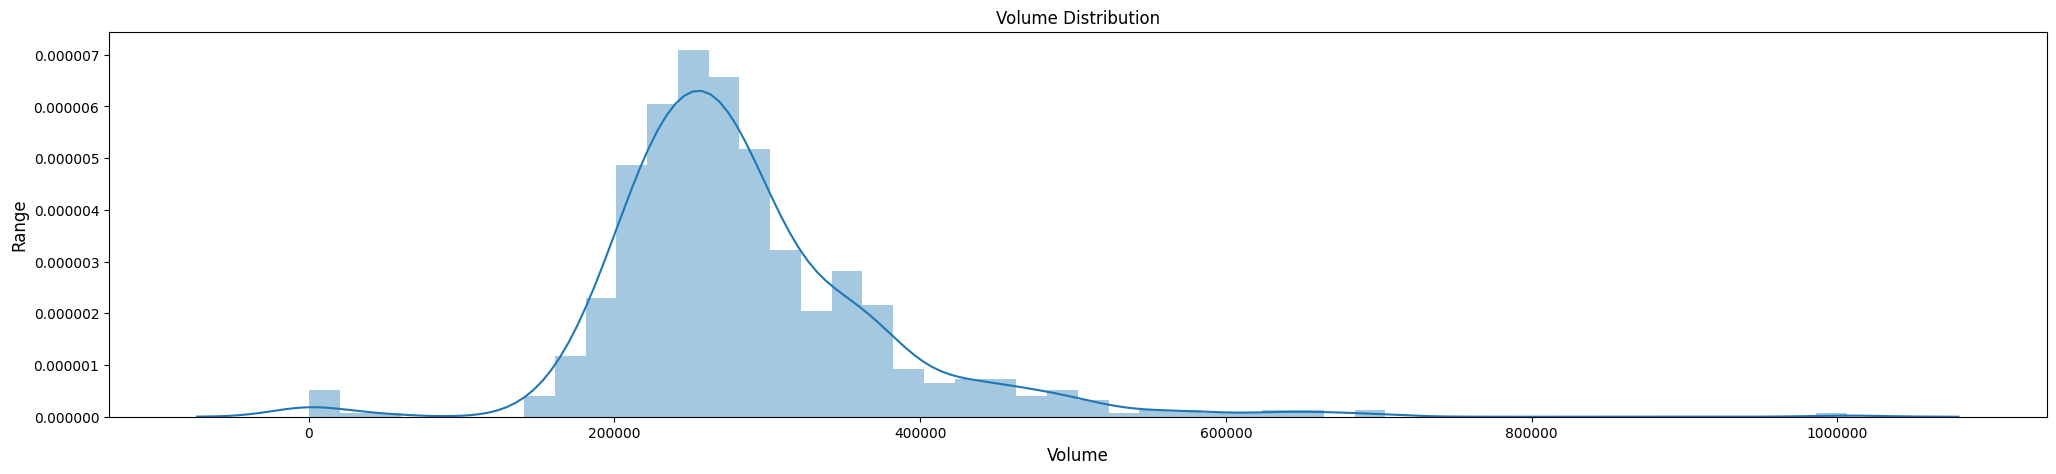

In [13]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

#plt.hist(nifty_data['Volume'])
sns.distplot(nifty_data['Volume'])

plt.xlabel('Volume', fontsize=12)
plt.ylabel('Range', fontsize=12)
plt.title('Volume Distribution', fontsize=12)
plt.show()

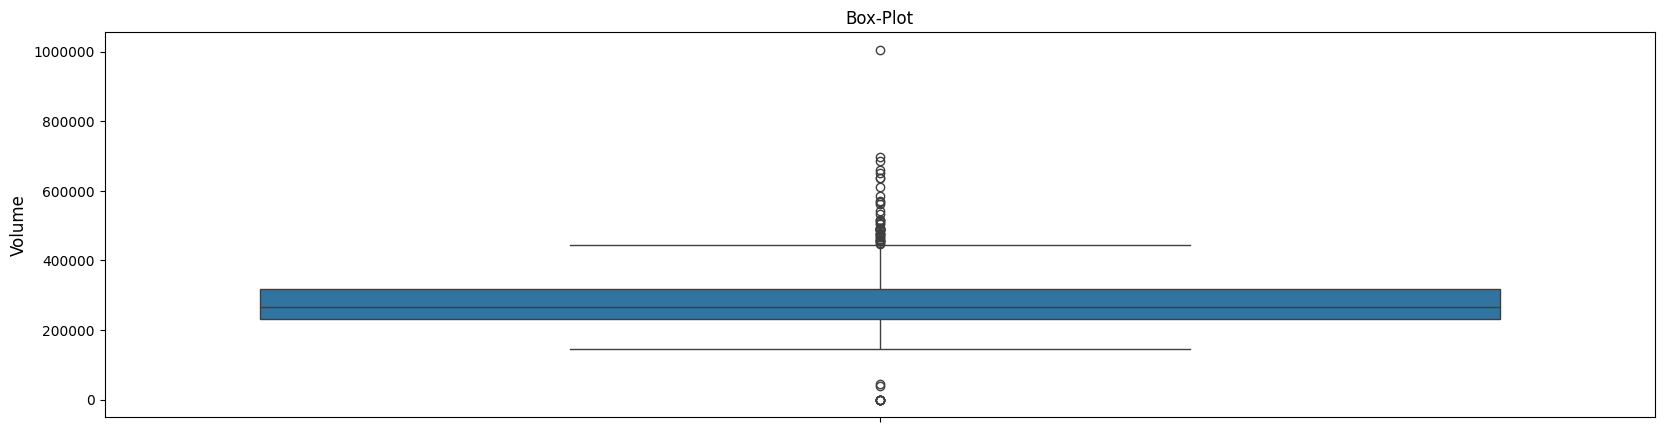

In [14]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain')

#plt.hist(nifty_data['Volume'])
sns.boxplot(nifty_data['Volume'])

plt.ylabel('Volume', fontsize=12)
plt.title('Box-Plot', fontsize=12)
plt.show()

In [15]:
print(nifty_data['Volume'].min(), nifty_data['Volume'].max())

Q1 = nifty_data['Volume'].quantile(q=0.25)
Q3 = nifty_data['Volume'].quantile(q=0.75)
IQR = Q3 - Q1   
Lower = (Q1 - 1.5 * IQR) 
Upper = (Q3 + 1.5 * IQR) 

print(Lower, Upper)

0 1006100
100800.0 447200.0


In [16]:
nifty_data[(nifty_data['Volume']<Lower)|(nifty_data['Volume']>Upper)].shape

(50, 6)

In [17]:
nifty_data.groupby([nifty_data.Date.dt.year,nifty_data.Date.dt.quarter])['Close'].mean() - nifty_data.groupby([nifty_data.Date.dt.year,nifty_data.Date.dt.quarter])['Open'].mean()

Date  Date
2022  1        3.86232
      2      -18.71925
      3       12.44830
      4       -5.95561
2023  1      -34.06379
      2        3.89577
      3      -10.79415
      4        5.00501
2024  1       -8.03587
      2      -11.78916
      3        3.40698
      4      -42.03711
2025  1      -54.76975
dtype: float64

In [18]:
nifty_data.groupby([nifty_data.Date.dt.year,nifty_data.Date.dt.quarter])['Volume'].mean()

Date  Date
2022  1      311722.95082
      2      282506.45161
      3      285096.82540
      4      234495.16129
2023  1      273233.87097
      2      255695.00000
      3      277722.22222
      4      245931.66667
2024  1      337545.00000
      2      341275.00000
      3      292814.06250
      4      284943.54839
2025  1      274761.11111
Name: Volume, dtype: float64

In [19]:
nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m")]).Close.mean() - nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m")]).Open.mean()

Date
2022-01     2.47236
2022-02    -0.87241
2022-03     9.69536
2022-04   -12.42352
2022-05   -28.69271
2022-06   -14.63636
2022-07    29.48070
2022-08    22.74492
2022-09   -13.17045
2022-10    -7.96320
2022-11    14.13588
2022-12   -23.40004
2023-01   -42.39769
2023-02   -31.41016
2023-03   -28.25716
2023-04    13.51183
2023-05     3.97035
2023-06    -3.96680
2023-07    -4.66602
2023-08   -30.14755
2023-09     4.06006
2023-10   -23.31982
2023-11    14.08984
2023-12    24.24502
2024-01   -17.94764
2024-02   -20.49293
2024-03    18.06109
2024-04    -4.30762
2024-05   -13.36654
2024-06   -17.92105
2024-07    22.15456
2024-08   -22.18350
2024-09     9.35714
2024-10   -65.29554
2024-11   -43.66591
2024-12   -16.19745
2025-01   -54.76975
dtype: float64

In [20]:
nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m")]).Volume.mean()

Date
2022-01   271775.00000
2022-02   281005.00000
2022-03   379023.80952
2022-04   297794.73684
2022-05   302057.14286
2022-06   250640.90909
2022-07   260728.57143
2022-08   279475.00000
2022-09   313468.18182
2022-10   238942.10526
2022-11   250342.85714
2022-12   215527.27273
2023-01   268223.80952
2023-02   284280.00000
2023-03   267723.80952
2023-04   262341.17647
2023-05   260795.45455
2023-06   244971.42857
2023-07   276309.52381
2023-08   273977.27273
2023-09   283325.00000
2023-10   212420.00000
2023-11   219305.00000
2023-12   306070.00000
2024-01   324971.42857
2024-02   320390.47619
2024-03   372227.77778
2024-04   301700.00000
2024-05   318638.09524
2024-06   407952.63158
2024-07   284118.18182
2024-08   301285.71429
2024-09   293452.38095
2024-10   287636.36364
2024-11   309878.94737
2024-12   259561.90476
2025-01   274761.11111
Name: Volume, dtype: float64

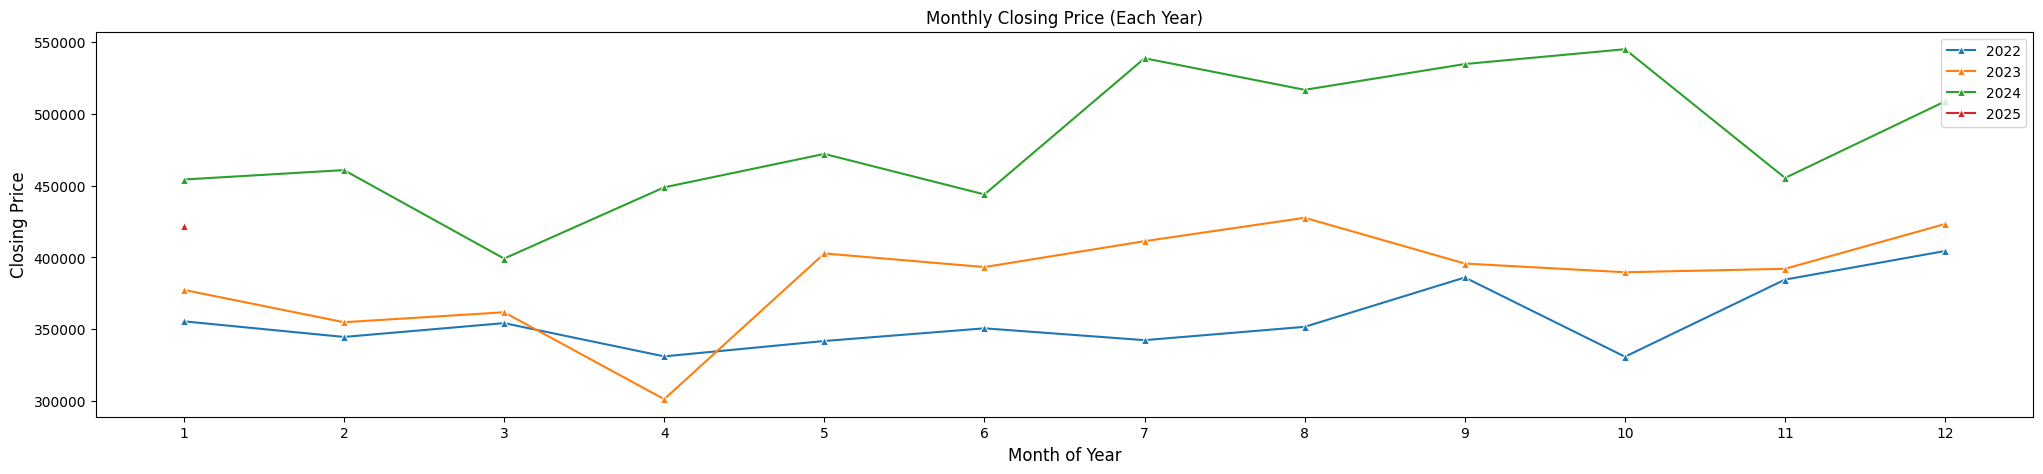

In [21]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.month.rename('month')])['Close'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(x='month',y='Close',data=grouped, hue='year',style='year', palette="tab10",markers=["^"],dashes=False)

plt.xticks(grouped.month.unique())
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Monthly Closing Price (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

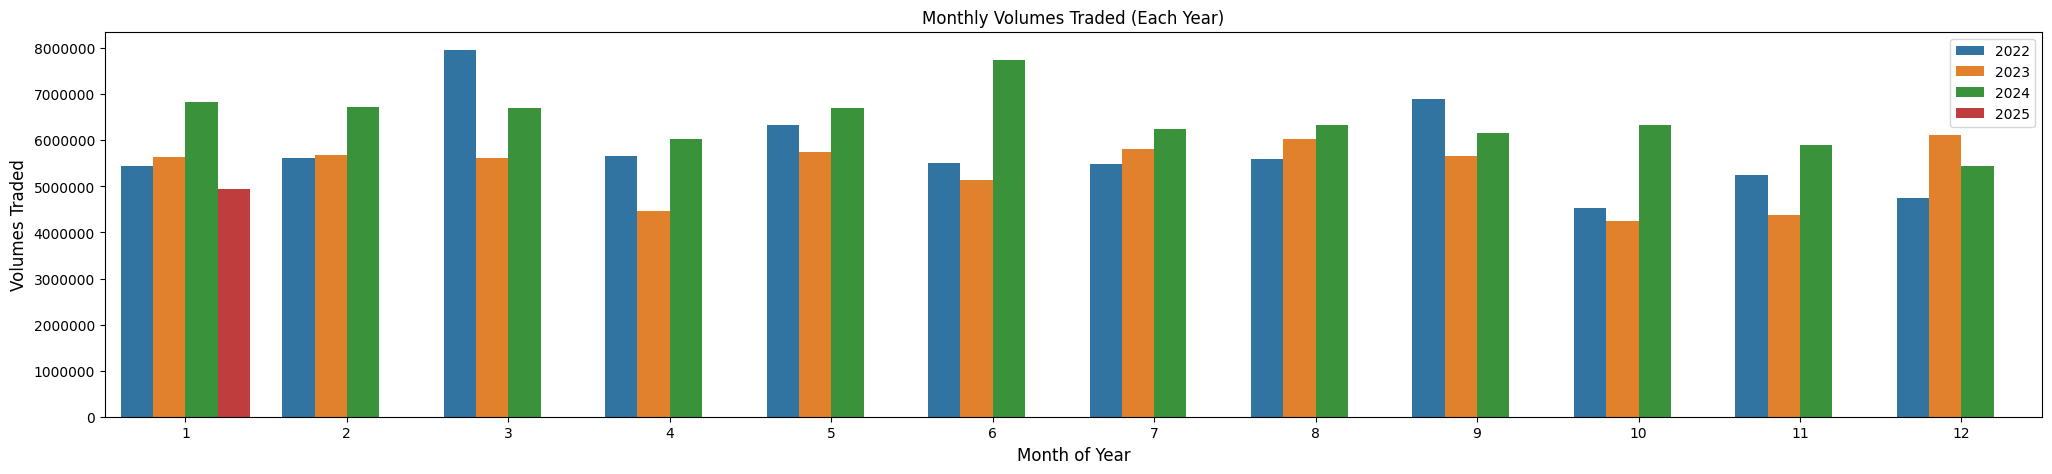

In [22]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.month.rename('month')])['Volume'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(x='month',y='Volume',data=grouped, hue='year', palette="tab10")

plt.xticks(grouped.month.unique().astype('str'))
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Volumes Traded', fontsize=12)
plt.title('Monthly Volumes Traded (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

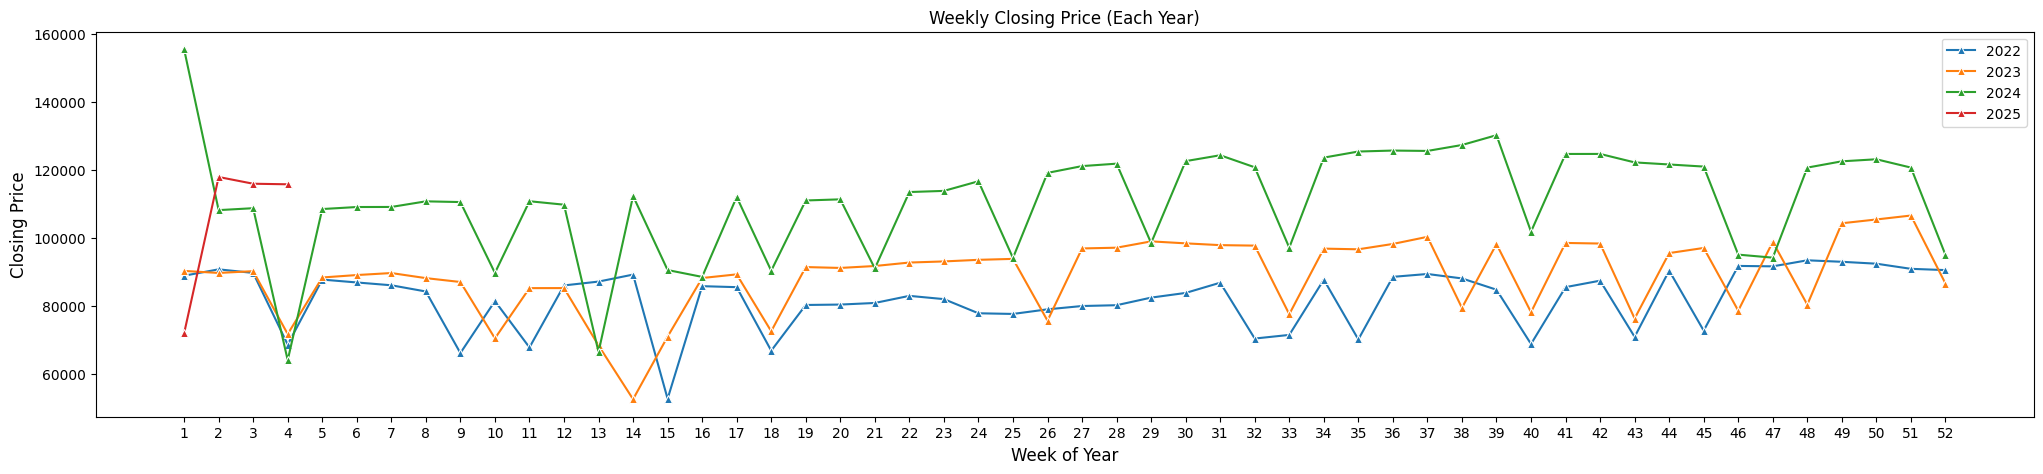

In [23]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.isocalendar().week.rename('week').astype('int64')])['Close'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(x='week',y='Close',data=grouped, hue='year',style='year', palette="tab10",markers=["^"],dashes=False)

plt.xticks(grouped.week.unique())
plt.xlabel('Week of Year', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Weekly Closing Price (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

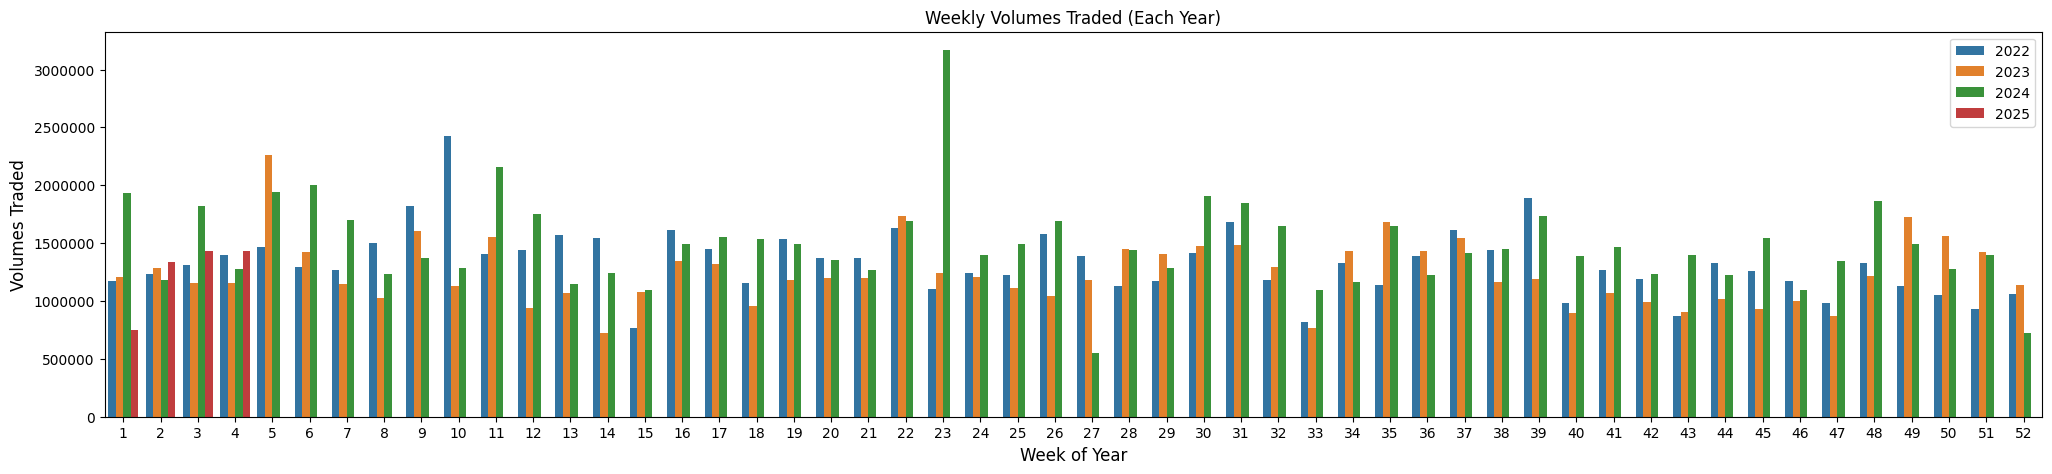

In [24]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.isocalendar().week.rename('week').astype('int64')])['Volume'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(x='week',y='Volume',data=grouped, hue='year', palette="tab10")

plt.xticks(grouped.week.unique().astype('str'))
plt.xlabel('Week of Year', fontsize=12)
plt.ylabel('Volumes Traded', fontsize=12)
plt.title('Weekly Volumes Traded (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

In [34]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Close'].agg(['sum','count','mean']).reset_index()
grouped['avg'] = grouped['sum']/grouped.shape[0]
grouped

weekday weekday_name           sum  count        mean          avg
0        0       Monday 3005463.80371    151 19903.73380 601092.76074
1        1      Tuesday 3010213.55762    150 20068.09038 602042.71152
2        2    Wednesday 2981914.39648    150 19879.42931 596382.87930
3        3     Thursday 3074869.79785    154 19966.68700 614973.95957
4        4       Friday 3036247.10352    152 19975.30989 607249.42070

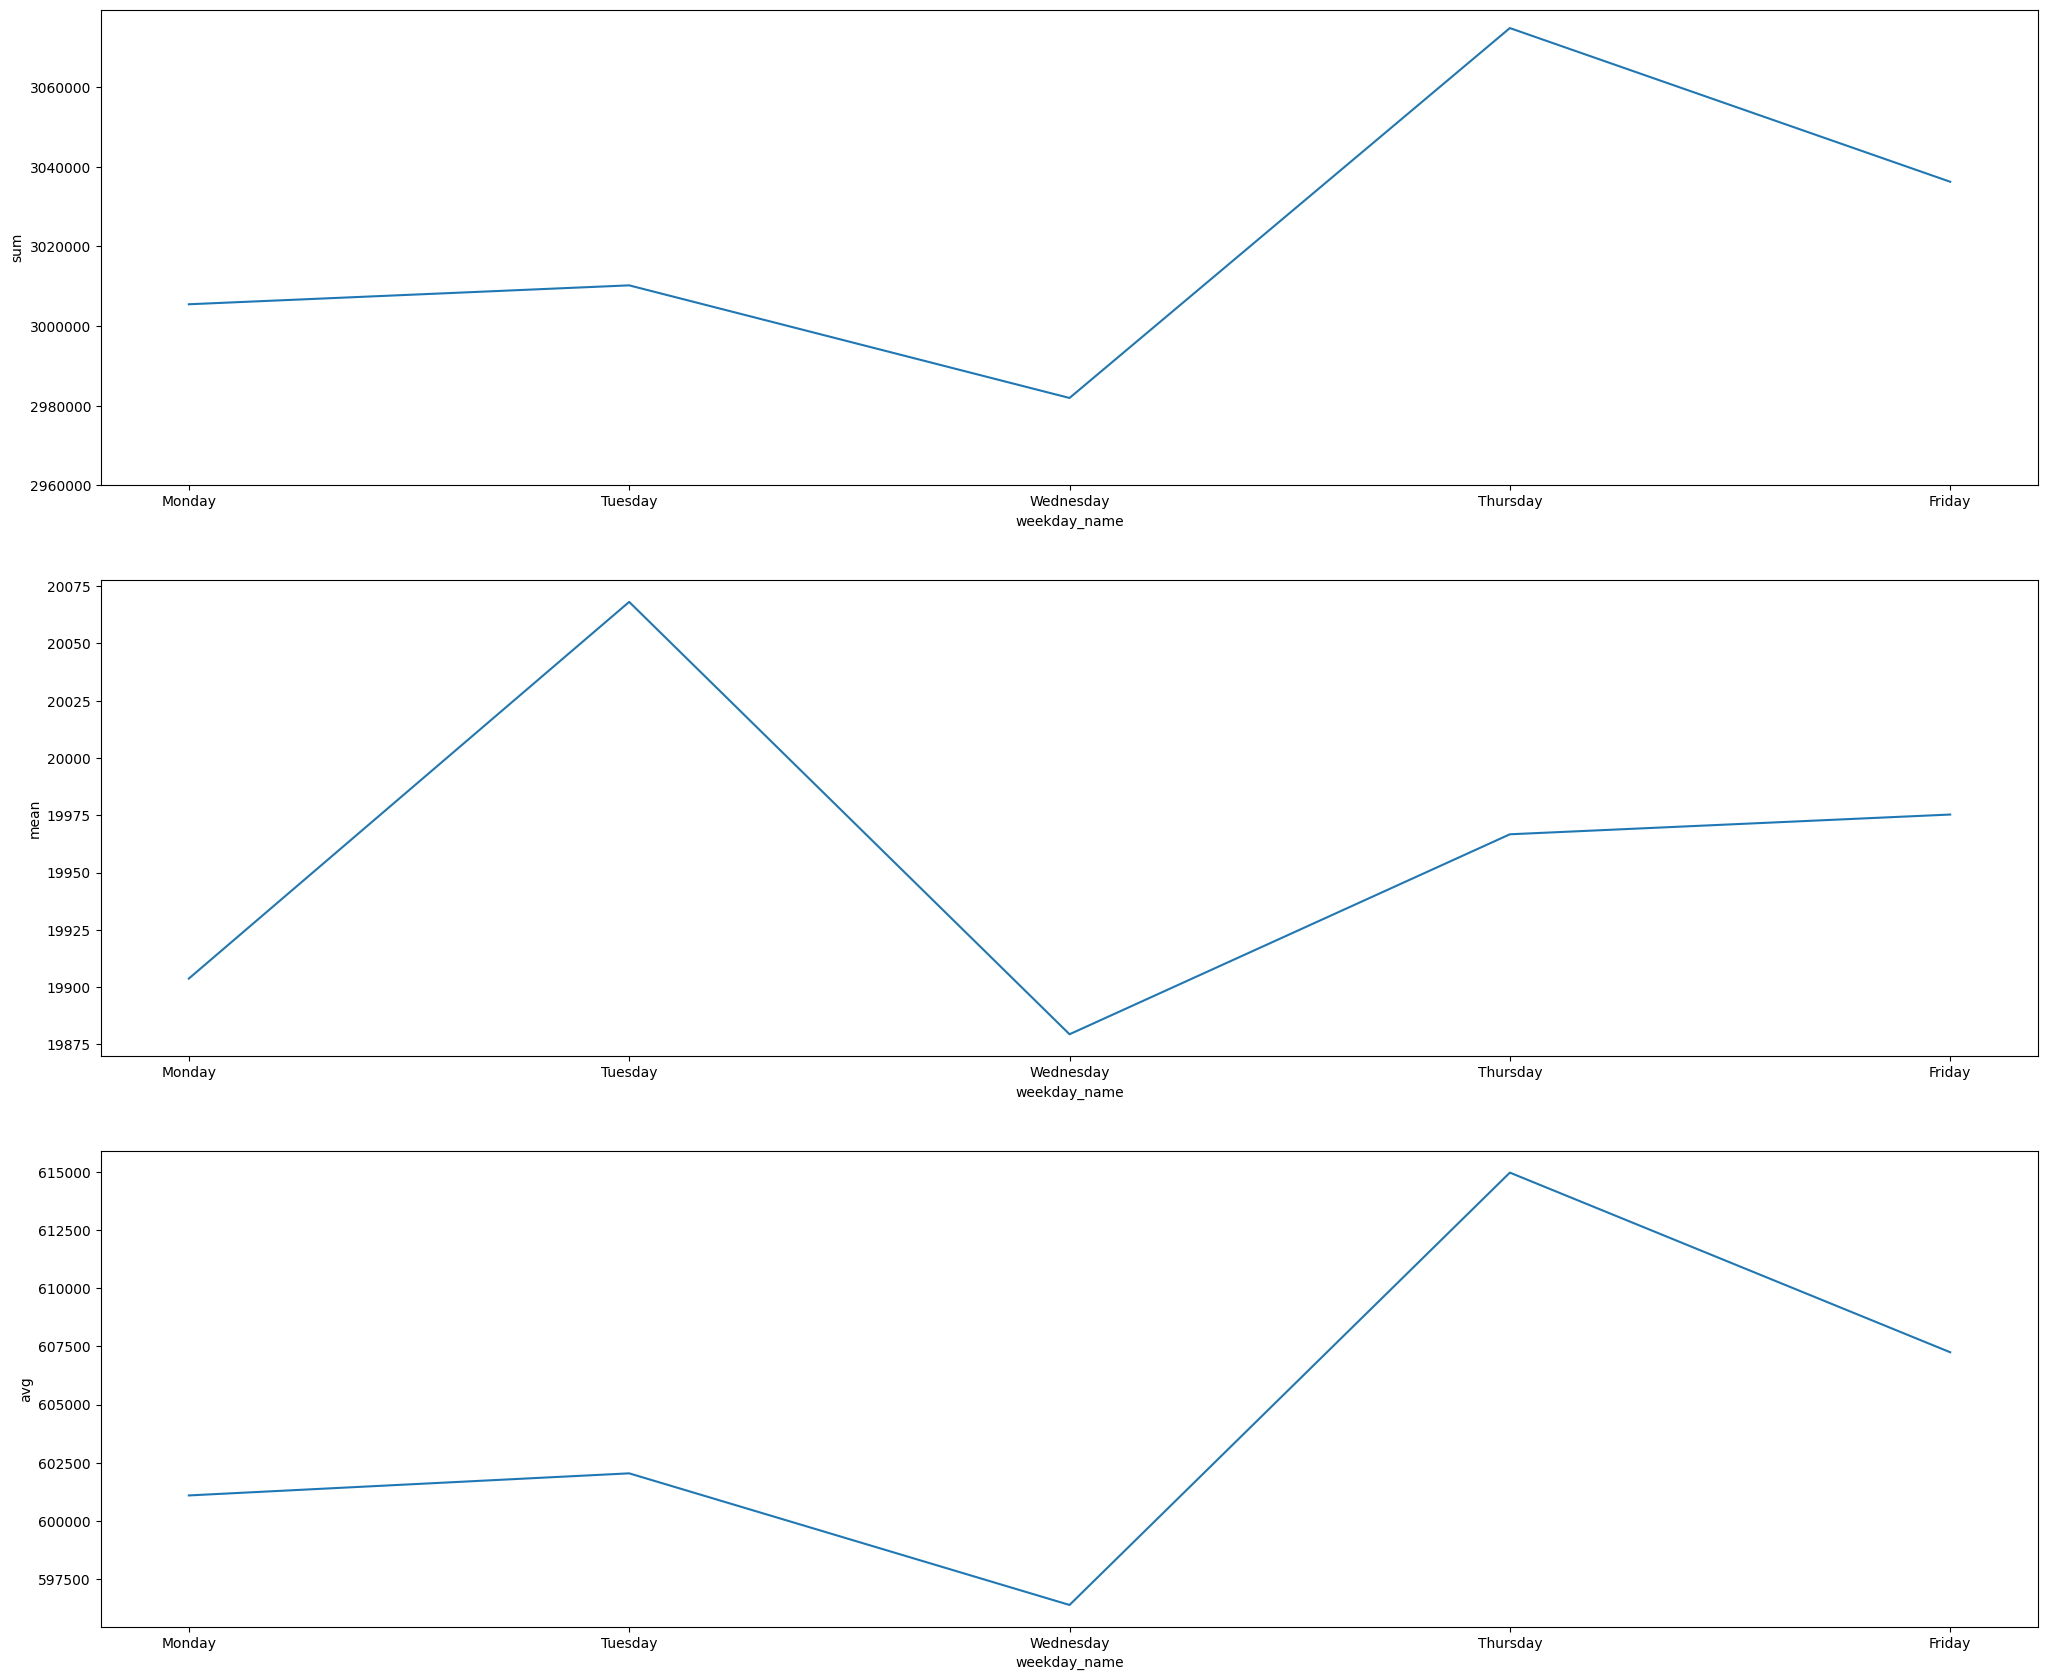

In [36]:
#grouped=nifty_data.groupby([nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Close'].sum().reset_index()

figure, axes = plt.subplots(3,1, figsize=(25, 21))
plt.ticklabel_format(style='plain')

sns.lineplot(x='weekday_name',y='sum',data=grouped, ax=axes[0])
sns.lineplot(x='weekday_name',y='mean',data=grouped, ax=axes[1])
sns.lineplot(x='weekday_name',y='avg',data=grouped, ax=axes[2])

axes[0].set_yticks(axes[0].get_yticks()[:-1], [f"{int(x):}" for x in axes[0].get_yticks()[:-1]])
#plt.xticks(grouped.weekday_name.unique())
#plt.xlabel('Weekday', fontsize=12)
#plt.ylabel('Sum of Closing Price', fontsize=12)
plt.show()

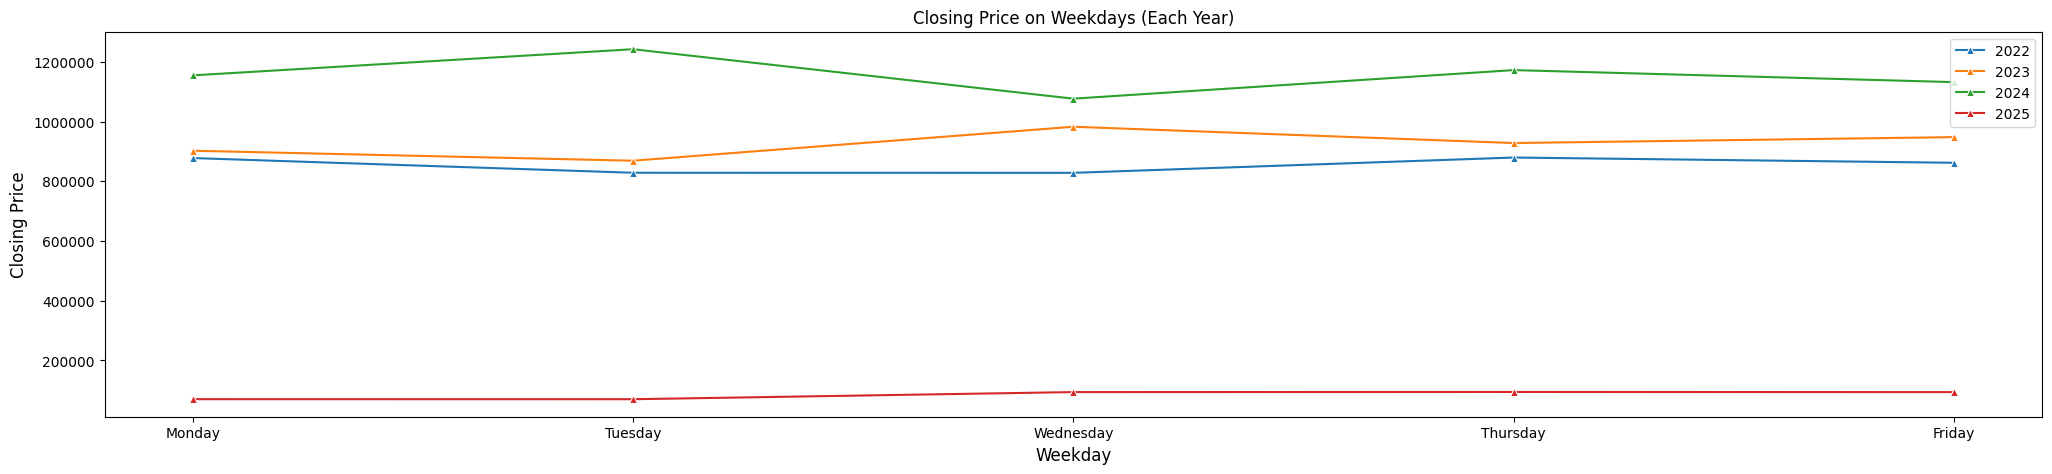

In [27]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Close'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(x='weekday_name',y='Close',data=grouped, hue='year',style='year', palette="tab10",markers=["^"],dashes=False)

plt.xticks(grouped.weekday_name.unique())
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Closing Price on Weekdays (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

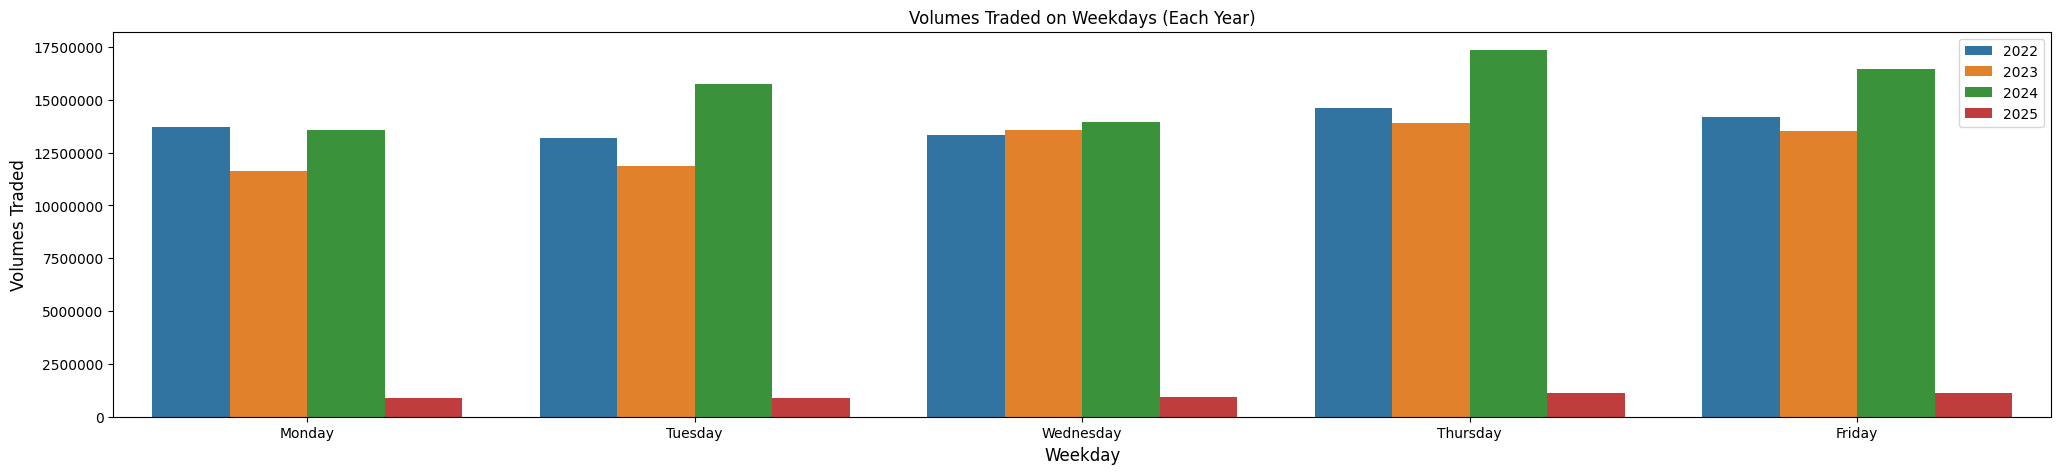

In [28]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.year.rename('year'),nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Volume'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(x='weekday_name',y='Volume',data=grouped, hue='year', palette="tab10")

plt.xticks(grouped.weekday_name.unique().astype('str'))
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Volumes Traded', fontsize=12)
plt.title('Volumes Traded on Weekdays (Each Year)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

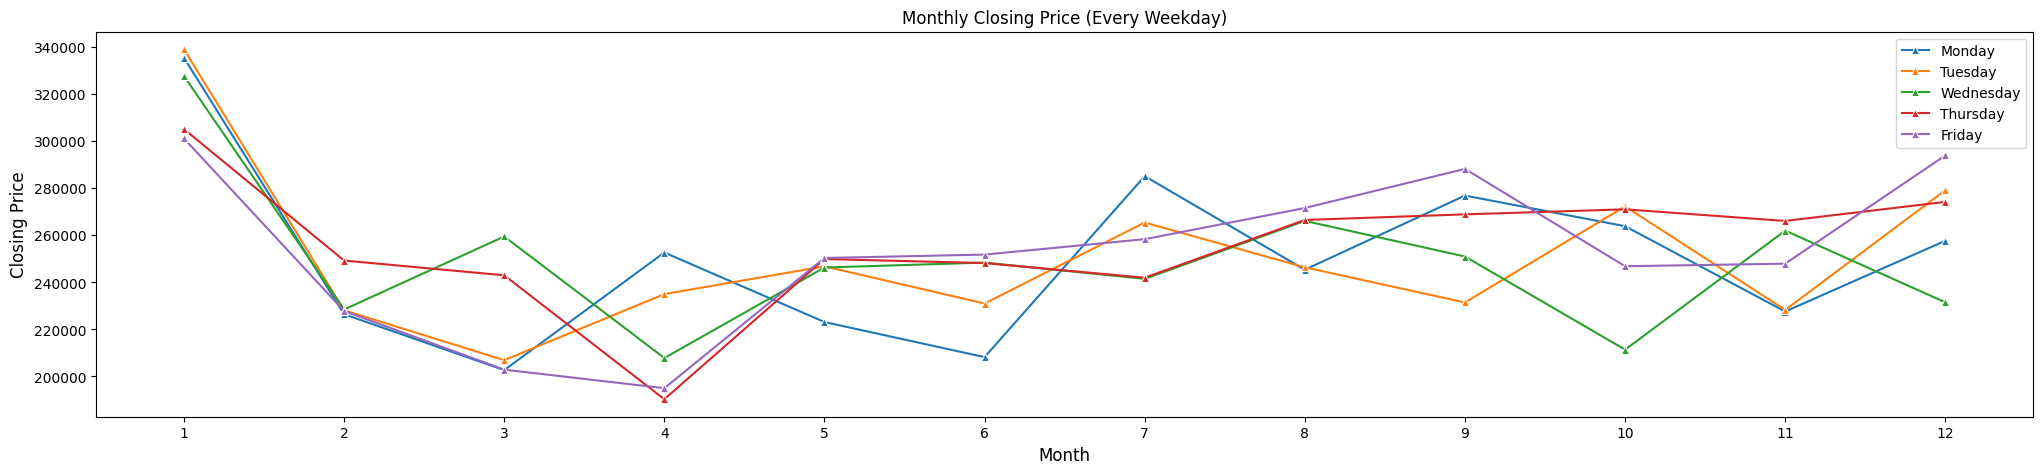

In [29]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.month.rename('month'),nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Close'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(x='month',y='Close',data=grouped, hue='weekday_name',style='weekday_name', palette="tab10",markers=["^"],dashes=False)

plt.xticks(grouped.month.unique())
plt.xlabel('Month', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Monthly Closing Price (Every Weekday)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

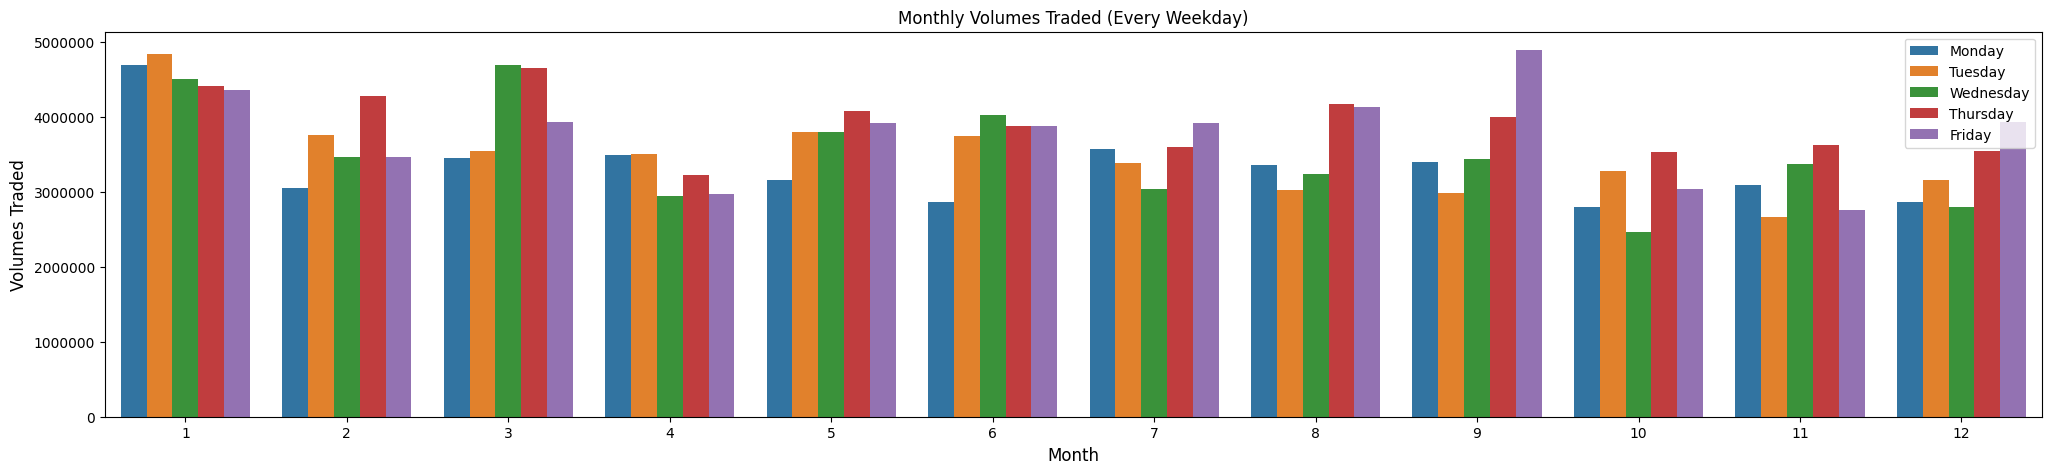

In [30]:
grouped=nifty_data.groupby([nifty_data['Date'].dt.month.rename('month'),nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Volume'].sum().reset_index()

plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(x='month',y='Volume',data=grouped, hue='weekday_name', palette="tab10")

plt.xticks(grouped.month.unique().astype('str'))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volumes Traded', fontsize=12)
plt.title('Monthly Volumes Traded (Every Weekday)', fontsize=12)
plt.legend(loc='upper right')
plt.show()

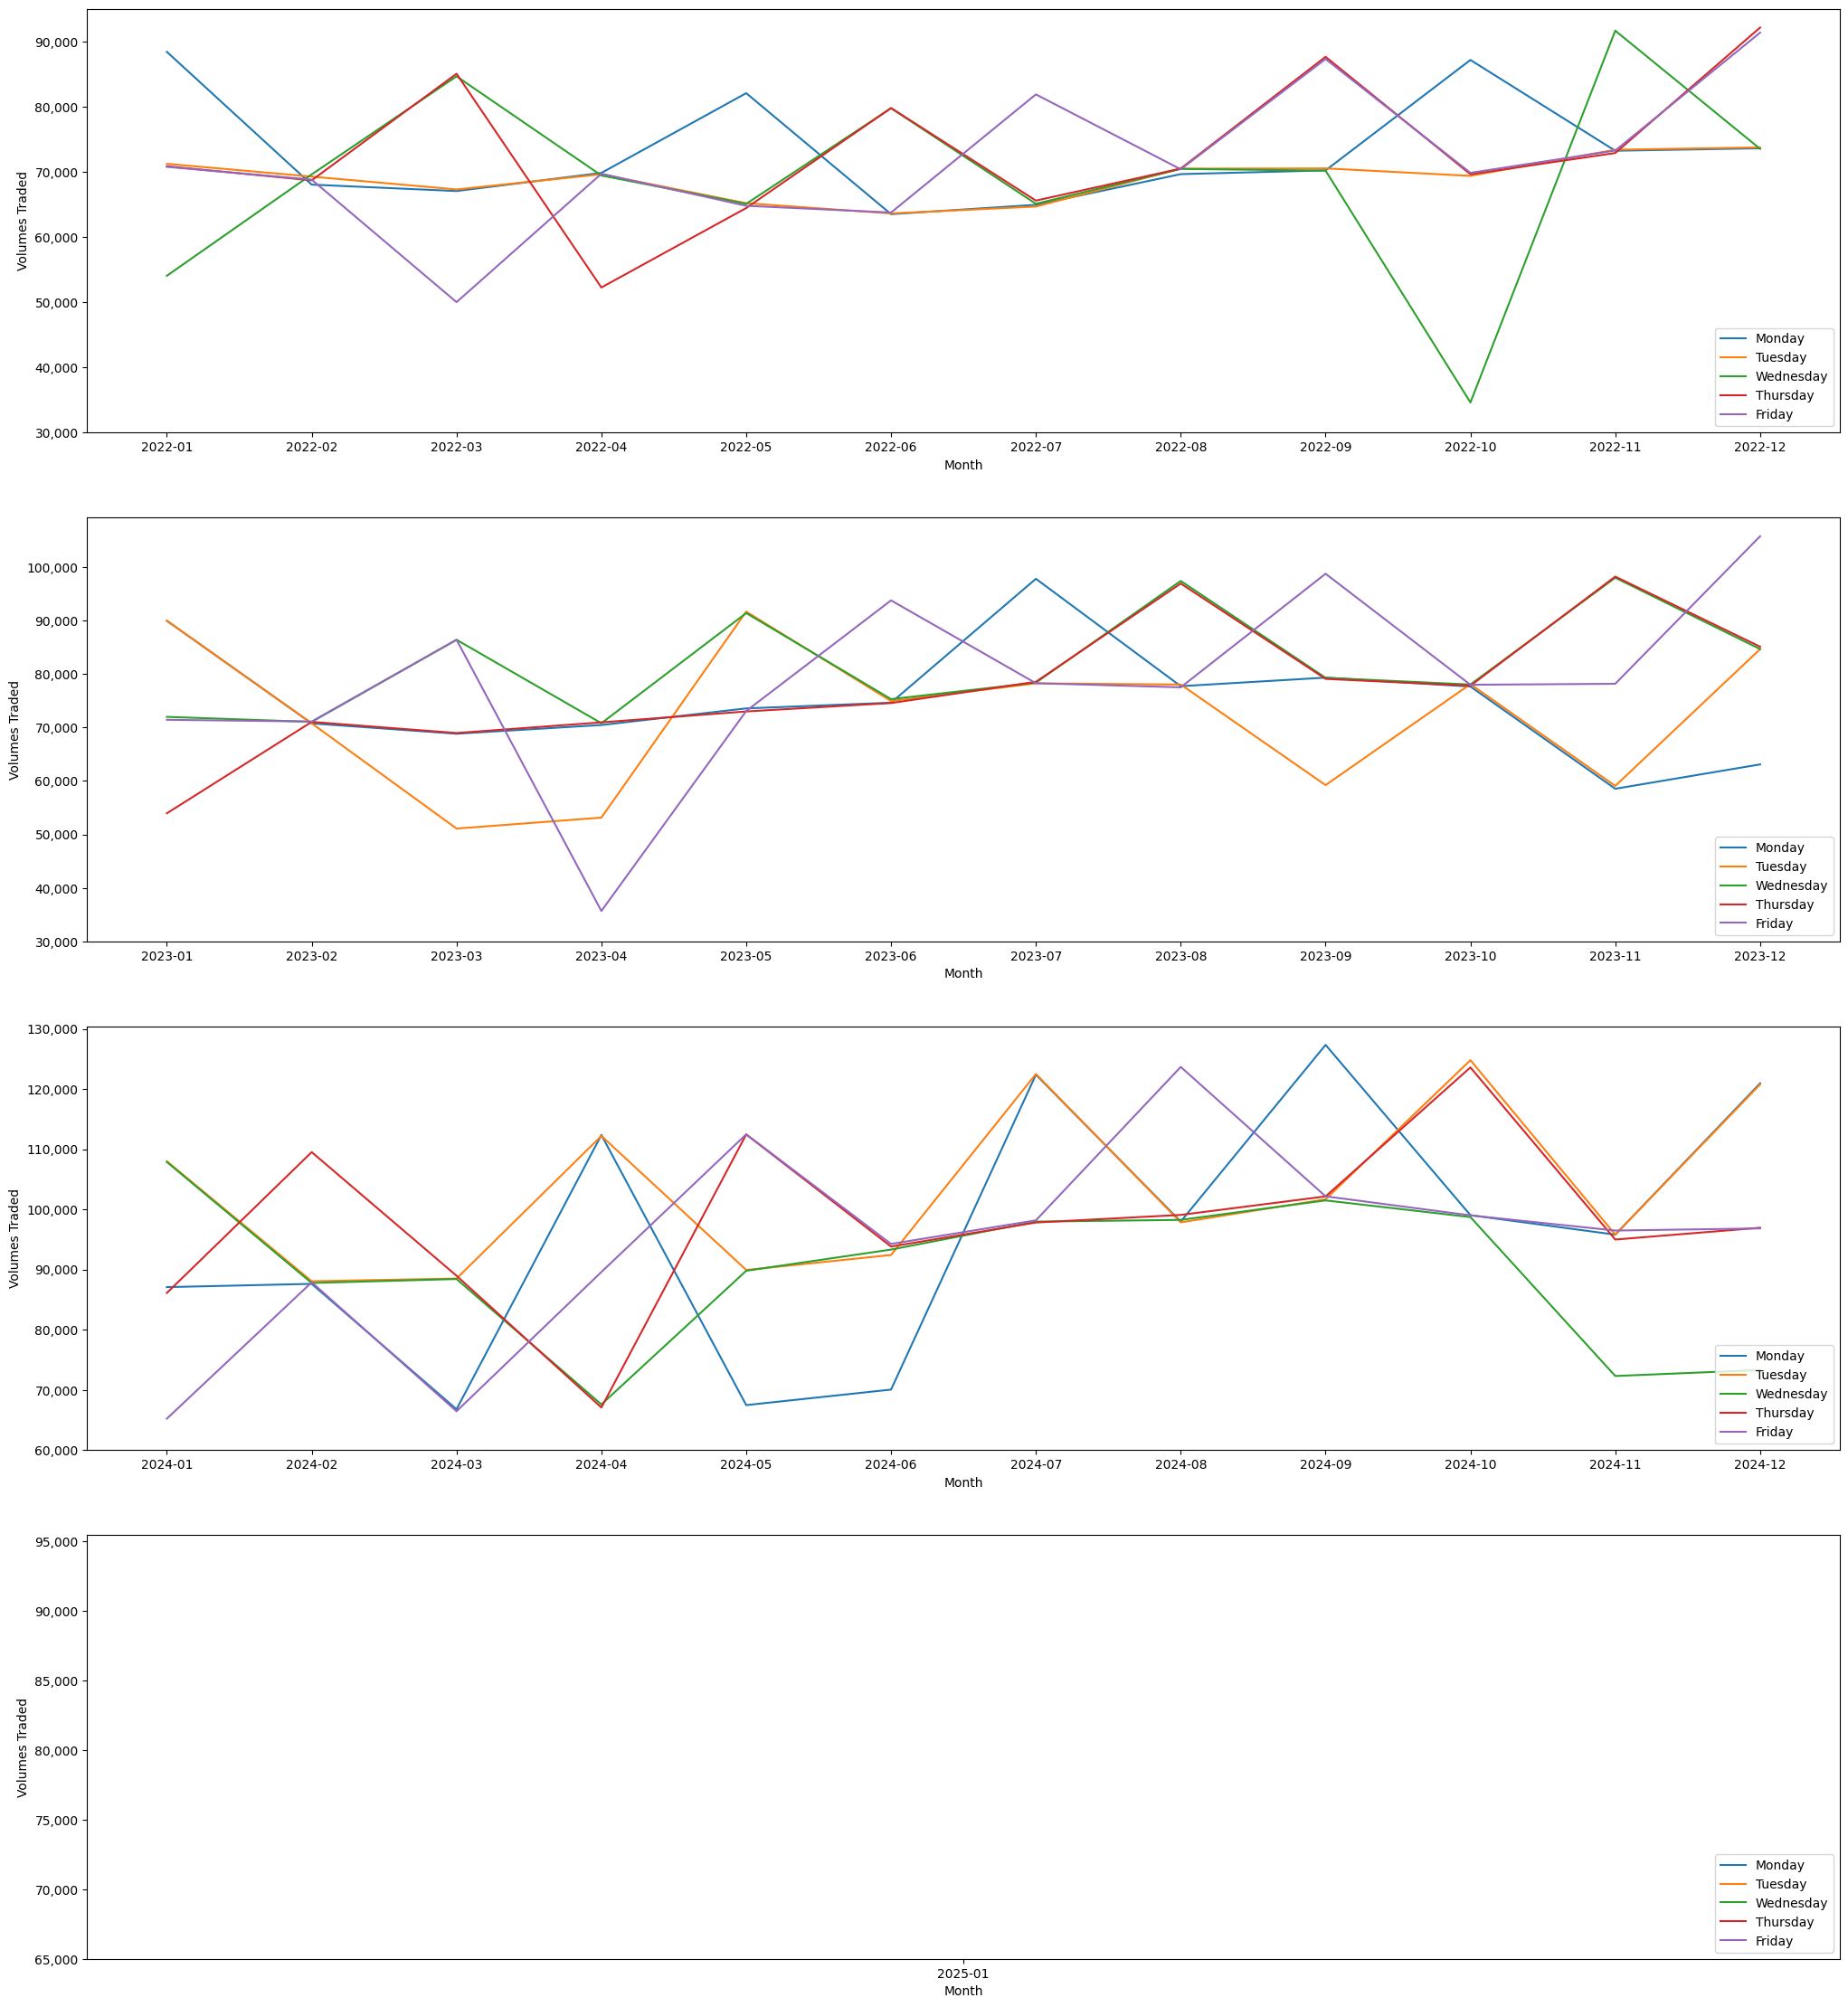

In [38]:
years = nifty_data.Date.dt.year.unique()
grouped=nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m").rename('year_month'),
                            nifty_data['Date'].dt.weekday.rename('weekday'),
                            nifty_data['Date'].dt.day_name().rename('weekday_name')]
                          )['Close'].sum().reset_index()

figure, axes = plt.subplots(len(years),1, figsize=(25, 28))
for i in range(len(years)):
    sns.lineplot(x='year_month',y='Close',data=grouped[grouped['year_month'].str[:4]==str(years[i])], hue='weekday_name', palette="tab10", ax=axes[i]
                ).set(xlabel = "Month", ylabel = "Volumes Traded")
    #axes[i].set_xticklabels(labels=grouped['year_month'].str[-2:].unique())
    axes[i].set_yticks(axes[i].get_yticks()[:-1], [f"{int(x):,}" for x in axes[i].get_yticks()[:-1]])
    axes[i].legend(loc='lower right')
plt.show()

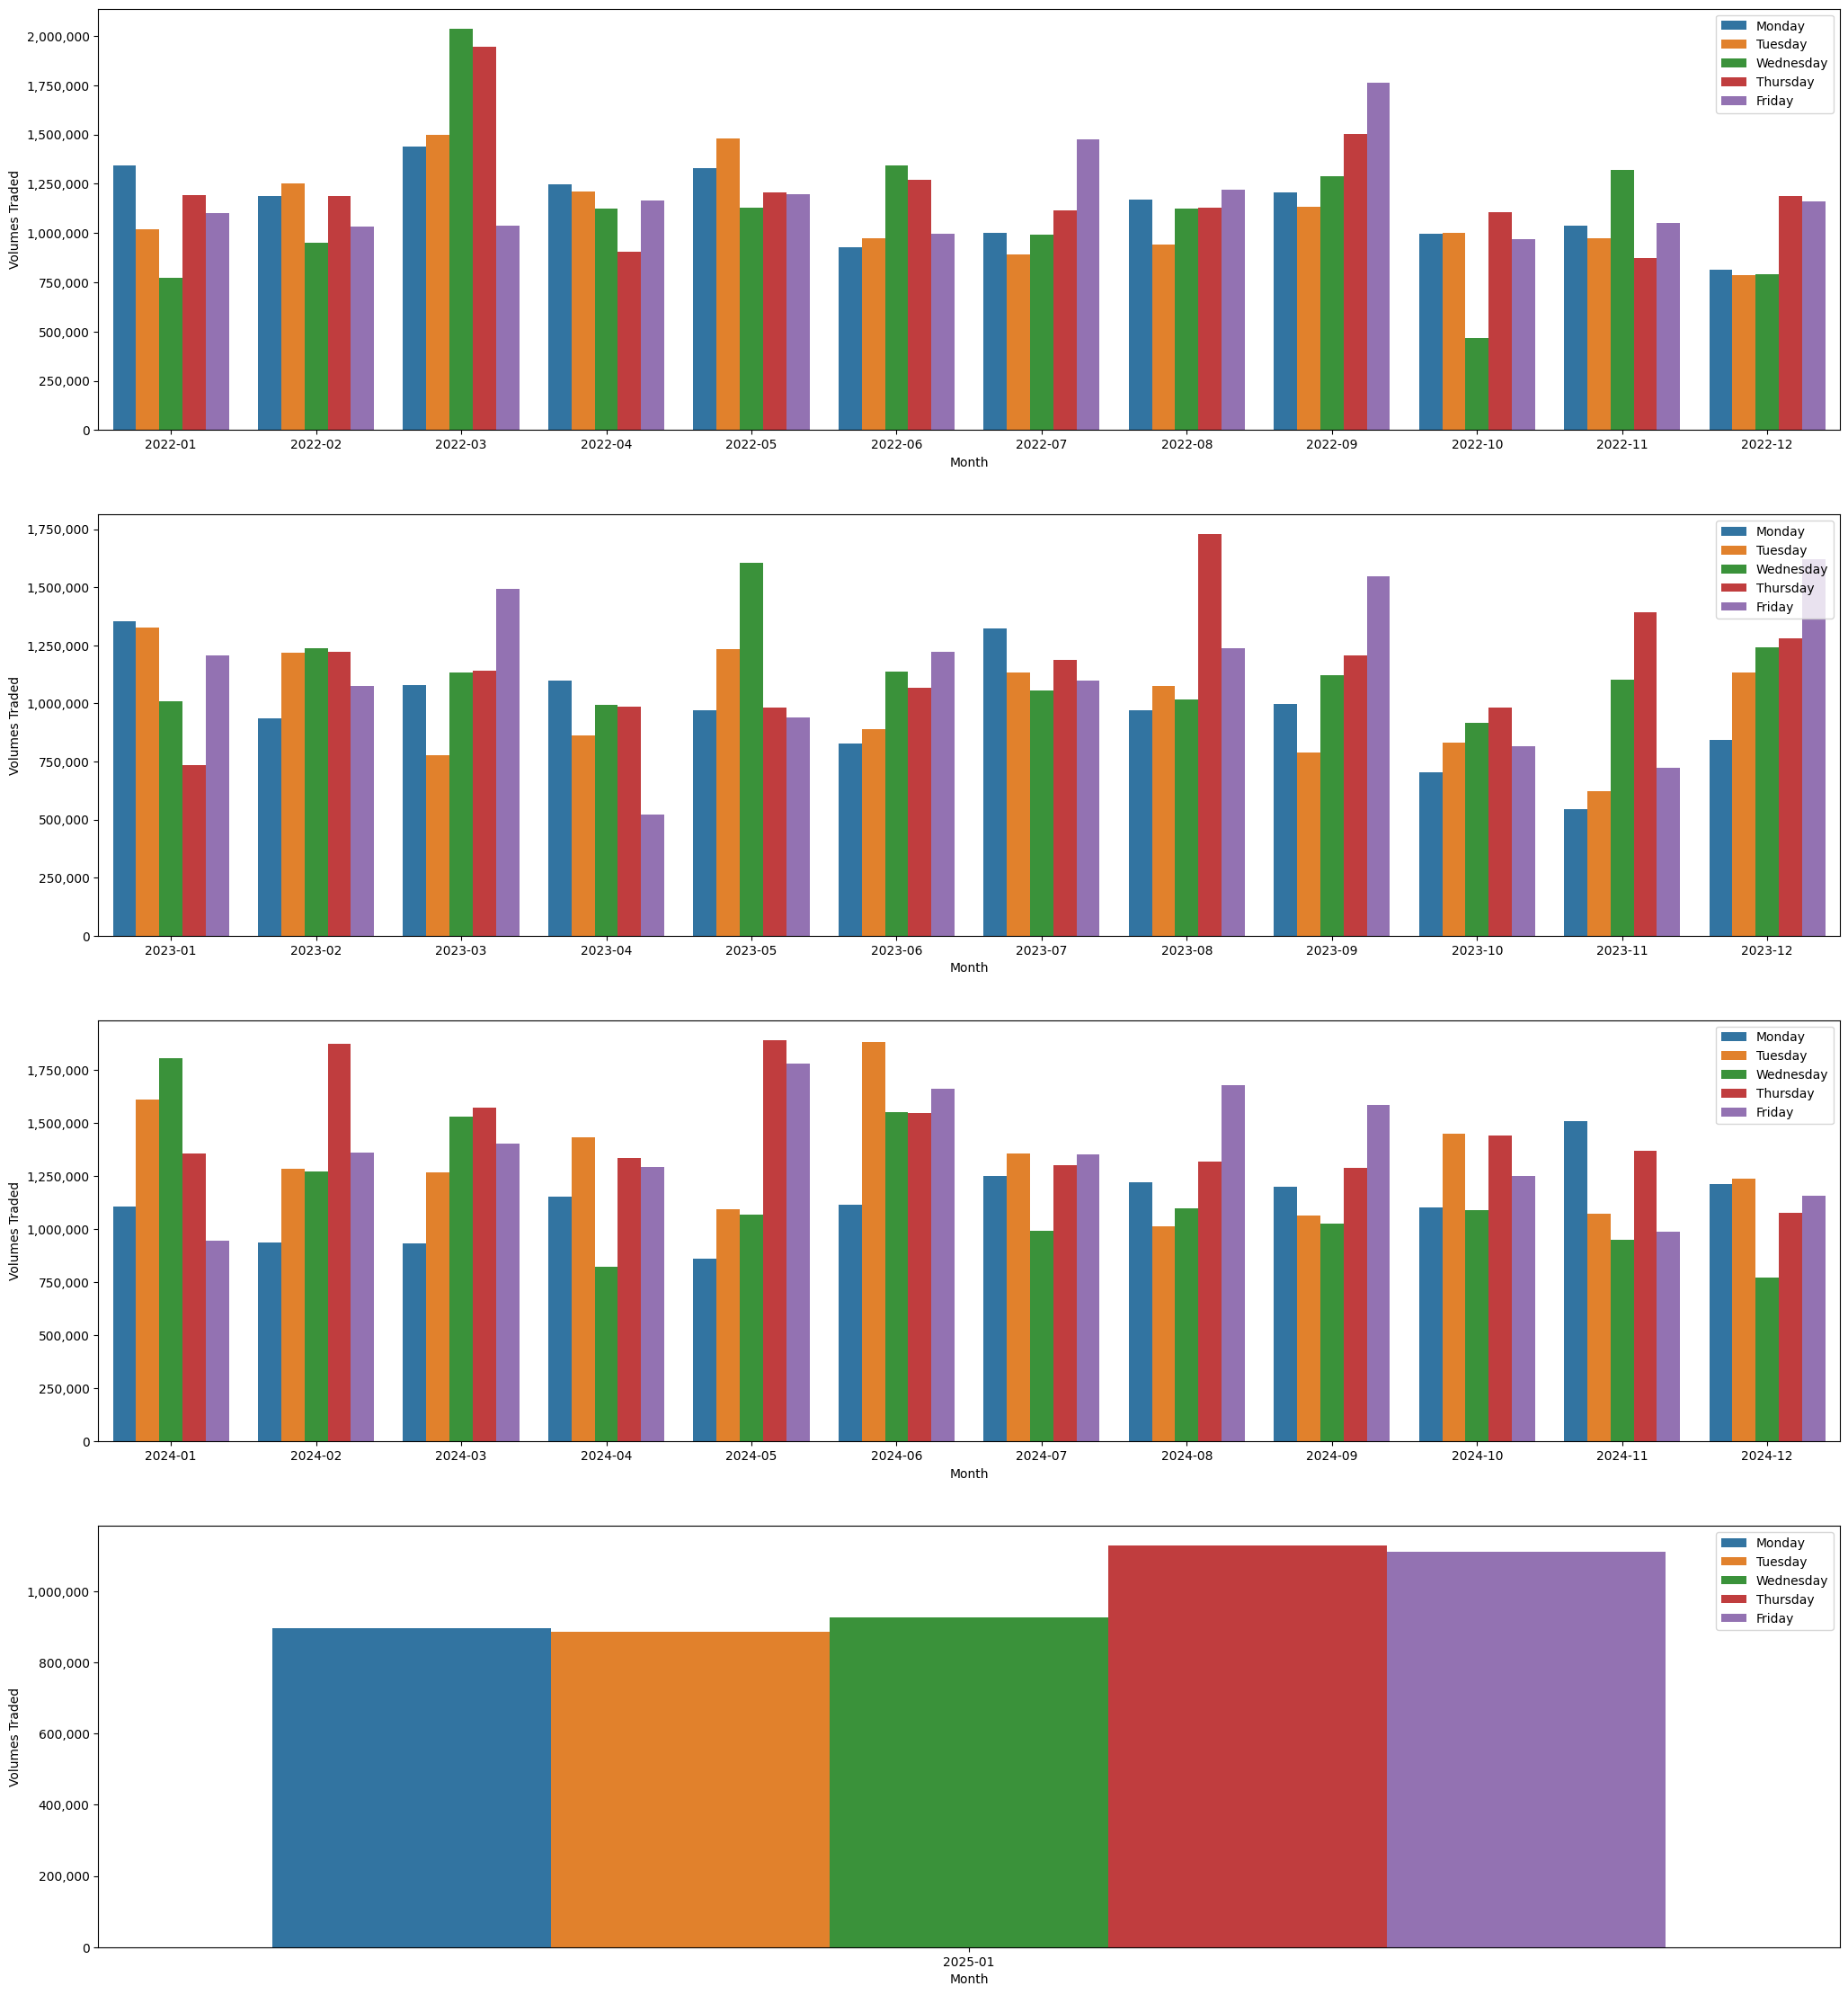

In [39]:
years = nifty_data.Date.dt.year.unique()
grouped=nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m").rename('year_month'),
                            nifty_data['Date'].dt.weekday.rename('weekday'),
                            nifty_data['Date'].dt.day_name().rename('weekday_name')]
                          )['Volume'].sum().reset_index()

figure, axes = plt.subplots(len(years),1, figsize=(25, 28))
for i in range(len(years)):
    sns.barplot(x='year_month',y='Volume',data=grouped[grouped['year_month'].str[:4]==str(years[i])], hue='weekday_name', palette="tab10", ax=axes[i]
               ).set(xlabel = "Month", ylabel = "Volumes Traded")
    #axes[i].set_xticklabels(labels=grouped['year_month'].str[-2:].unique())
    axes[i].set_yticks(axes[i].get_yticks()[:-1], [f"{int(x):,}" for x in axes[i].get_yticks()[:-1]])
    axes[i].legend(loc='upper right')
plt.show()

In [40]:
#nifty_data.groupby([nifty_data['Date'].dt.strftime("%Y-%m").rename('year_month'),nifty_data['Date'].dt.weekday.rename('weekday'),nifty_data['Date'].dt.day_name().rename('weekday_name')])['Volume'].sum().unstack(fill_value=0).stack().to_frame().reset_index().rename(columns={0:'Volume'})

In [41]:
del grouped

### Feature Engineering

In [42]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    757 non-null    datetime64[ns]
 1   Close   757 non-null    float64       
 2   High    757 non-null    float64       
 3   Low     757 non-null    float64       
 4   Open    757 non-null    float64       
 5   Volume  757 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.6 KB


In [43]:
# nifty_data[nifty_data['Adj Close']==nifty_data['Close']].shape
# nifty_data.drop('Adj Close', axis=1, inplace=True)

# nifty_data['Target'] = nifty_data['Close'].shift(-1)
# nifty_data = nifty_data.dropna()

# nifty_all=nifty_data.copy()

In [44]:
# Price-Based Features
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change()

nifty_data['Log_Return'] = np.log(nifty_data['Close'] / nifty_data['Close'].shift(1))

nifty_data['Price_Change'] = nifty_data['Close'] - nifty_data['Close'].shift(1)

In [45]:
# Volume-Based Features
nifty_data['Relative_Volume'] = nifty_data['Volume'] / nifty_data['Volume'].rolling(window=5).mean()

nifty_data['OBV'] = (nifty_data['Volume'] * ((nifty_data['Close'] > nifty_data['Close'].shift(1).fillna(0)) * 2 - 1)).cumsum()

In [46]:
# Time-Based Features
nifty_data['Day_of_Week'] = nifty_data['Date'].dt.dayofweek
nifty_data['Month'] = nifty_data['Date'].dt.month
nifty_data['Day_of_Month'] = nifty_data['Date'].dt.day
nifty_data['Week_Num'] = nifty_data['Date'].dt.isocalendar().week.rename('week').astype('int64')

In [47]:
# Derivative Features
# Rolling statistics
nifty_data['MA_5'] = nifty_data['Close'].rolling(window=5, min_periods=1).mean()
# nifty_data['MA_10'] = nifty_data['Close'].rolling(window=10, min_periods=1).mean()
# nifty_data['MA_20'] = nifty_data['Close'].rolling(window=20, min_periods=1).mean()
# nifty_data['MA_50'] = nifty_data['Close'].rolling(window=50, min_periods=1).mean()
# nifty_data['MA_200'] = nifty_data['Close'].rolling(window=200, min_periods=1).mean()

nifty_data['MSD_5'] = nifty_data['Close'].rolling(window=5, min_periods=1).std()
# nifty_data['MSD_10'] = nifty_data['Close'].rolling(window=10, min_periods=1).std()
# nifty_data['MSD_20'] = nifty_data['Close'].rolling(window=20, min_periods=1).std()
# nifty_data['MSD_50'] = nifty_data['Close'].rolling(window=50, min_periods=1).std()
# nifty_data['MSD_200'] = nifty_data['Close'].rolling(window=200, min_periods=1).std()

nifty_data['Lagged_Close_1'] = nifty_data['Close'].shift(1)
# nifty_data['Lagged_Close_7'] = nifty_data['Close'].shift(7)
# nifty_data['Lagged_Close_30'] = nifty_data['Close'].shift(30)

In [48]:
# from ta.trend import SMAIndicator, MACD
# from ta.momentum import RSIIndicator

# # Simple Moving Average (SMA)
# nifty_data['SMA_5'] = SMAIndicator(close=nifty_data['Close'], window=5).sma_indicator()
# nifty_data['SMA_10'] = SMAIndicator(close=nifty_data['Close'], window=10).sma_indicator()
# nifty_data['SMA_20'] = SMAIndicator(close=nifty_data['Close'], window=20).sma_indicator()
# nifty_data['SMA_50'] = SMAIndicator(close=nifty_data['Close'], window=50).sma_indicator()
# nifty_data['SMA_200'] = SMAIndicator(close=nifty_data['Close'], window=200).sma_indicator()

# # Relative Strength Index (RSI)
# nifty_data['RSI_7'] = RSIIndicator(close=nifty_data['Close'], window=7).rsi()
# nifty_data['RSI_14'] = RSIIndicator(close=nifty_data['Close'], window=14).rsi()
# nifty_data['RSI_30'] = RSIIndicator(close=nifty_data['Close'], window=30).rsi()

# # Moving Average Convergence Divergence (MACD) 12,26
# macd = MACD(close=nifty_data['Close'])
# nifty_data['MACD'] = macd.macd()
# nifty_data['MACD_Signal'] = macd.macd_signal()
# nifty_data['MACD_Diff'] = macd.macd_diff()

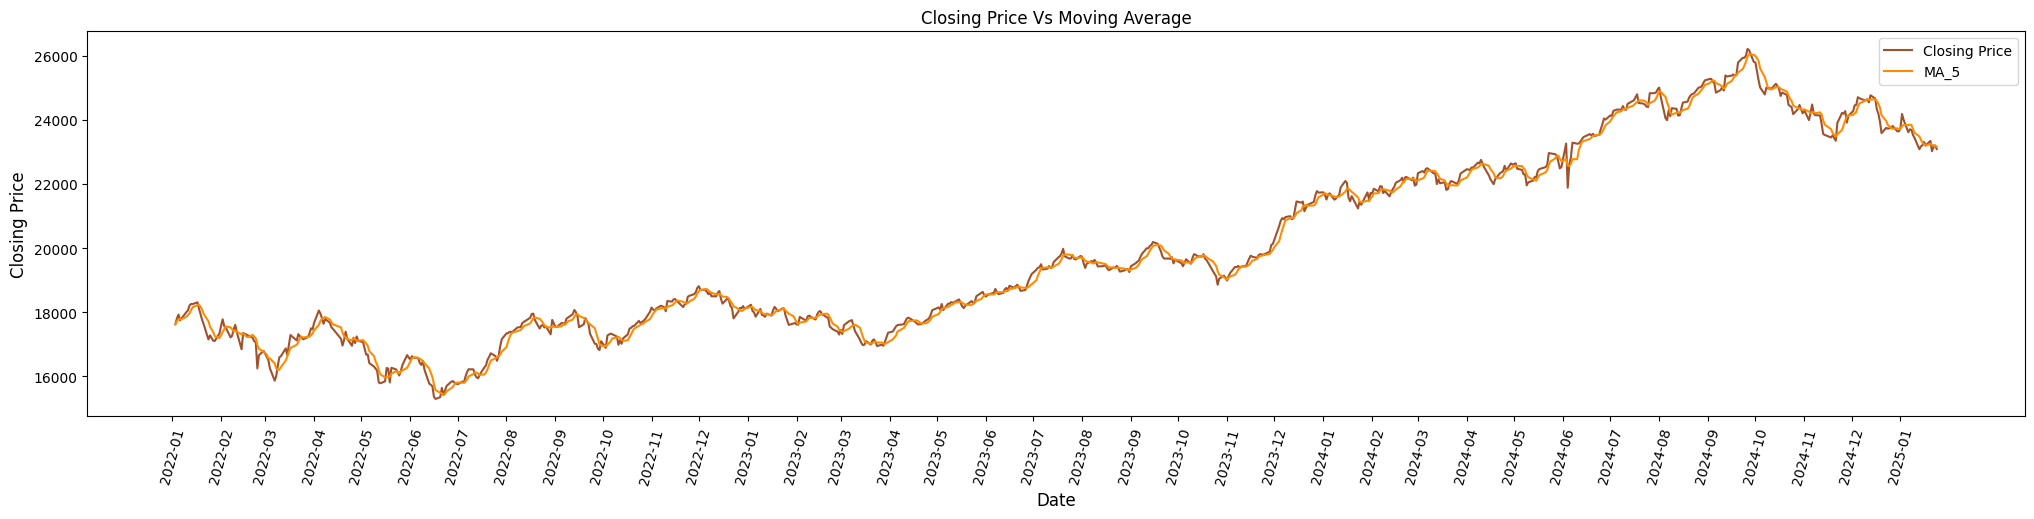

In [49]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.lineplot(x='Date', y='Close', data=nifty_data, color='sienna', label='Closing Price')
sns.lineplot(x='Date', y='MA_5', data=nifty_data, color='darkorange', label='MA_5')
# sns.lineplot(x='Date', y='MA_10', data=nifty_data, color='green', label='MA_10')
# sns.lineplot(x='Date', y='MA_20', data=nifty_data, color='yellow', label='MA_20')
# sns.lineplot(x='Date', y='MA_50', data=nifty_data, color='orange', label='MA_50')
# sns.lineplot(x='Date', y='MA_200', data=nifty_data, color='pink', label='MA_200')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(nifty_data['Date'].dt.strftime("%Y-%m").unique().astype('str'))
plt.xticks(rotation=75)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Closing Price Vs Moving Average', fontsize=12)
plt.legend()
plt.show()

In [50]:
# # Market index performance
# sp500_data = yf.download('^GSPC', start='2022-01-01', end='2024-11-30')
# sp500_data.reset_index(inplace=True)
# sp500_data.columns = sp500_data.columns.droplevel(1)
# sp500_data

In [51]:
# nifty_data = pd.merge(nifty_data, sp500_data[['Date','Close']], left_on='Date', right_on='Date', how='left').rename(columns={'Close_x':'Close','Close_y':'SP500'})
# del sp500_data
nifty_data

Price       Date       Close        High         Low        Open   Volume  \
0     2022-01-03 17625.69922 17646.65039 17383.30078 17387.15039   200500   
1     2022-01-04 17805.25000 17827.59961 17593.55078 17681.40039   247400   
2     2022-01-05 17925.25000 17944.69922 17748.84961 17820.09961   251500   
3     2022-01-06 17745.90039 17797.94922 17655.55078 17768.50000   236500   
4     2022-01-07 17812.69922 17905.00000 17704.55078 17797.59961   239300   
5     2022-01-10 18003.30078 18017.44922 17879.15039 17913.30078   232400   
6     2022-01-11 18055.75000 18081.25000 17964.40039 17997.75000   220200   
7     2022-01-12 18212.34961 18227.94922 18128.80078 18170.40039   245000   
8     2022-01-13 18257.80078 18272.25000 18163.80078 18257.00000   303700   
9     2022-01-14 18255.75000 18286.94922 18119.65039 18185.00000   229500   
10    2022-01-17 18308.09961 18321.55078 18228.75000 18235.65039   266700   
11    2022-01-18 18113.05078 18350.94922 18085.90039 18337.19922   227500   
12    2022-01-19 17938.40039 18129.19922 17884.90039 18129.19922   276700   
13    2022-01-20 17757.00000 17943.69922 17648.44922 17921.00000   258100   
14    2022-01-21 17617.15039 17707.59961 17485.84961 17613.69922   277600   
15    2022-01-24 17149.09961 17599.40039 16997.84961 17575.15039   323800   
16    2022-01-25 17277.94922 17309.15039 16836.80078 17001.55078   326500   
17    2022-01-27 17110.15039 17182.50000 16866.75000 17062.00000   395600   
18    2022-01-28 17101.94922 17373.50000 17077.09961 17208.30078   355300   
19    2022-01-31 17339.84961 17410.00000 17264.15039 17301.05078   321700   
20    2022-02-01 17576.84961 17622.40039 17244.55078 17529.44922   386400   
21    2022-02-02 17780.00000 17794.59961 17674.80078 17706.19922   271200   
22    2022-02-03 17560.19922 17781.15039 17511.15039 17767.75000   226600   
23    2022-02-04 17516.30078 17617.80078 17462.55078 17590.19922   261400   
24    2022-02-07 17213.59961 17536.75000 17119.40039 17456.30078   265000   
25    2022-02-08 17266.75000 17306.44922 17043.65039 17279.84961   268500   
26    2022-02-09 17463.80078 17477.15039 17339.00000 17370.09961   236400   
27    2022-02-10 17605.84961 17639.44922 17427.15039 17554.09961   273600   
28    2022-02-11 17374.75000 17454.75000 17303.00000 17451.00000   253100   
29    2022-02-14 16842.80078 17099.50000 16809.65039 17076.15039   305500   
30    2022-02-15 17352.44922 17375.00000 16839.25000 16933.25000   298700   
31    2022-02-16 17322.19922 17490.59961 17257.69922 17408.44922   244500   
32    2022-02-17 17304.59961 17442.90039 17235.84961 17396.55078   232100   
33    2022-02-18 17276.30078 17380.80078 17219.19922 17236.05078   189600   
34    2022-02-21 17206.65039 17351.05078 17070.69922 17192.25000   215200   
35    2022-02-22 17092.19922 17148.55078 16843.80078 16847.94922   300100   
36    2022-02-23 17063.25000 17220.69922 17027.84961 17194.50000   200200   
37    2022-02-24 16247.95020 16705.25000 16203.25000 16548.90039   458000   
38    2022-02-25 16658.40039 16748.80078 16478.30078 16515.65039   329800   
39    2022-02-28 16793.90039 16815.90039 16356.29980 16481.59961   404200   
40    2022-03-02 16605.94922 16678.50000 16478.65039 16593.09961   517700   
41    2022-03-03 16498.05078 16768.94922 16442.94922 16723.19922   442100   
42    2022-03-04 16245.34961 16456.00000 16133.79980 16339.45020   456100   
43    2022-03-07 15863.15039 15944.59961 15711.45020 15867.95020   585400   
44    2022-03-08 16013.45020 16028.75000 15671.45020 15747.75000   543600   
45    2022-03-09 16345.34961 16418.05078 15990.00000 16078.00000   462200   
46    2022-03-10 16594.90039 16757.30078 16447.90039 16757.09961   486400   
47    2022-03-11 16630.44922 16694.40039 16470.90039 16528.80078   343700   
48    2022-03-14 16871.30078 16887.94922 16606.50000 16633.69922   314700   
49    2022-03-15 16663.00000 16927.75000 16555.00000 16900.65039   381600   
50    2022-03-16 16975.34961 16987.90039 16837.84961 16876.65039   260000

##### Clustering - Not Required

In [52]:
# # Using KMeans to cluster stocks based on price patterns
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# dataset_new = nifty_data[['Open', 'High', 'Low', 'Close']].values

# limit = int((dataset_new.shape[0]//2)**0.5)

In [53]:
# # selecting optimal value of 'k' using elbow method
# # wcss - within cluster sum of squared distances
# wcss = {} 
# for k in range(2,limit+1):
#     model = KMeans(n_clusters=k)
#     model.fit(dataset_new)
#     wcss[k] = model.inertia_

# plt.figure(figsize=(10,5))
# plt.plot(wcss.keys(), wcss.values(), 'gs-')
# plt.xlabel('Values of "k"')
# plt.ylabel('WCSS')
# plt.show()

In [54]:
# # determining number of clusters using silhouette score method
# max, k_score = 0, 0
# for k in range(2, limit+1):
#     model = KMeans(n_clusters=k)
#     model.fit(dataset_new)
#     pred = model.predict(dataset_new)
#     score = silhouette_score(dataset_new, pred)
#     print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))
#     if score>max:
#         max=score
#         k_score = k
#     #print(max)

In [55]:
# # using k = k_score
# model = KMeans(n_clusters=k_score)
# pred = model.fit_predict(dataset_new)

# #colours = ['red', 'blue', 'green', 'yellow', 'orange', 'pink']
# for i in np.unique(model.labels_):
#     plt.scatter(dataset_new[pred==i, 0],
#                 dataset_new[pred==i, 1])
     
# # plotting the cluster centroids
# plt.scatter(model.cluster_centers_[:, 0], 
#             model.cluster_centers_[:, 1], 
#             s = 100,  # marker size
#             c = 'black')

# plt.figure(figsize=(10,5))
# plt.title('K Means clustering')
# plt.show()

In [56]:
# kmeans = KMeans(n_clusters=k_score, random_state=42)
# nifty_data['Cluster'] = kmeans.fit_predict(dataset_new)

# nifty_data[['Date','Open', 'High', 'Low', 'Close','Volume','Cluster']]

##### TA Features - Not Required

In [57]:
# # !pip install ta
# from ta import add_all_ta_features

# nifty_all = add_all_ta_features(nifty_all, open="Open", high="High", low="Low", close="Close", volume="Volume")

In [58]:
# nifty_all.info()

In [59]:
# nifty_all.isnull().sum()

In [60]:
# nifty_all.nunique()

In [61]:
# nifty_all.fillna(method='bfill', inplace=True)

# nifty_all

In [62]:
# corr_all = nifty_all.drop('Date', axis=1).corr(method = 'pearson')
# corr_all

In [63]:
# #corr.loc[corr.index[5:], 'Target']
# corr_all.iloc[5:,5:].iloc[5:,:1]

In [64]:
# print(corr_all['Target'].sort_values()[0:5], corr_all['Target'].sort_values()[-7:-2])

In [65]:
# feats_all=corr_all[(corr_all['Target']>0.5)|(corr_all['Target']<-0.5)].index.to_list()

##### Sentiment Analysis - Not Required

In [66]:
# url = f'https://eodhd.com/api/exchanges-list/?api_token=6766ca528fd9d5.60150714&fmt=json'

# EXCHANGE_CODE = "NSE"
# url = f'https://eodhd.com/api/exchange-symbol-list/{EXCHANGE_CODE}?api_token=6766ca528fd9d5.60150714&fmt=json'
# data = requests.get(url).json()

# for items in data:
#     print(items['date'])

# for items in data:
#     for k,v in items.items():
#         print(k,v)

In [67]:
# url = f'https://eodhd.com/api/news?t=stock market&from=2020-01-01&to=2024-11-30&limit=1000&api_token=6766ca528fd9d5.60150714&fmt=json'
# data1 = requests.get(url).json()

# url = f'https://eodhd.com/api/news?t=stock market&from=2020-01-01&to=2023-02-15&limit=1000&api_token=6766ca528fd9d5.60150714&fmt=json'
# data2 = requests.get(url).json()

# news_data1 = [{'headline': items['title'], 'published_at': items['date']} for items in data1]
# news_data1 = pd.DataFrame(news_data1)

# news_data2 = [{'headline': items['title'], 'published_at': items['date']} for items in data2]
# news_data2 = pd.DataFrame(news_data2)

# df_news = pd.concat([news_data1,news_data2])
# df_news.reset_index(drop=True, inplace=True)
# df_news.shape

In [68]:
# df_news[df_news.duplicated(keep=False)].shape

In [69]:
# # Perform sentiment analysis
# sia = SentimentIntensityAnalyzer()
# df_news['sentiment_score'] = df_news['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
# df_news['published_at'] = pd.to_datetime(df_news['published_at']).dt.date

# # Aggregate sentiment by date
# df_daily_sentiment = df_news.groupby('published_at').agg(
#     average_sentiment=('sentiment_score', 'mean'),
#     positive_count=('sentiment_score', lambda x: (x > 0.05).sum()),
#     negative_count=('sentiment_score', lambda x: (x < -0.05).sum())
# ).reset_index()
# df_daily_sentiment['published_at'] = pd.to_datetime(df_daily_sentiment['published_at'])

# df_daily_sentiment

In [70]:
# df_daily_sentiment.describe()

In [71]:
# del news_data1,news_data2

In [72]:
# df_combined = pd.merge(nifty_data, df_daily_sentiment, left_on='Date', right_on='published_at', how='left')
# df_combined

In [73]:
#2023 data with sentiment analysis
#Dec 24 data as final test
#Predict 30 working days

### Feature Selection

In [74]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             757 non-null    datetime64[ns]
 1   Close            757 non-null    float64       
 2   High             757 non-null    float64       
 3   Low              757 non-null    float64       
 4   Open             757 non-null    float64       
 5   Volume           757 non-null    int64         
 6   Daily_Return     756 non-null    float64       
 7   Log_Return       756 non-null    float64       
 8   Price_Change     756 non-null    float64       
 9   Relative_Volume  753 non-null    float64       
 10  OBV              757 non-null    int64         
 11  Day_of_Week      757 non-null    int32         
 12  Month            757 non-null    int32         
 13  Day_of_Month     757 non-null    int32         
 14  Week_Num         757 non-null    int64    

In [75]:
nifty_data.isnull().sum()

Price
Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
Daily_Return       1
Log_Return         1
Price_Change       1
Relative_Volume    4
OBV                0
Day_of_Week        0
Month              0
Day_of_Month       0
Week_Num           0
MA_5               0
MSD_5              1
Lagged_Close_1     1
dtype: int64

In [76]:
nifty_data.nunique()

Price
Date               757
Close              755
High               756
Low                756
Open               755
Volume             640
Daily_Return       756
Log_Return         756
Price_Change       742
Relative_Volume    746
OBV                747
Day_of_Week          5
Month               12
Day_of_Month        31
Week_Num            52
MA_5               757
MSD_5              756
Lagged_Close_1     754
dtype: int64

In [77]:
nifty_data.fillna(method='bfill', inplace=True)
nifty_data = nifty_data.dropna()

nifty_data

Price       Date       Close        High         Low        Open   Volume  \
0     2022-01-03 17625.69922 17646.65039 17383.30078 17387.15039   200500   
1     2022-01-04 17805.25000 17827.59961 17593.55078 17681.40039   247400   
2     2022-01-05 17925.25000 17944.69922 17748.84961 17820.09961   251500   
3     2022-01-06 17745.90039 17797.94922 17655.55078 17768.50000   236500   
4     2022-01-07 17812.69922 17905.00000 17704.55078 17797.59961   239300   
5     2022-01-10 18003.30078 18017.44922 17879.15039 17913.30078   232400   
6     2022-01-11 18055.75000 18081.25000 17964.40039 17997.75000   220200   
7     2022-01-12 18212.34961 18227.94922 18128.80078 18170.40039   245000   
8     2022-01-13 18257.80078 18272.25000 18163.80078 18257.00000   303700   
9     2022-01-14 18255.75000 18286.94922 18119.65039 18185.00000   229500   
10    2022-01-17 18308.09961 18321.55078 18228.75000 18235.65039   266700   
11    2022-01-18 18113.05078 18350.94922 18085.90039 18337.19922   227500   
12    2022-01-19 17938.40039 18129.19922 17884.90039 18129.19922   276700   
13    2022-01-20 17757.00000 17943.69922 17648.44922 17921.00000   258100   
14    2022-01-21 17617.15039 17707.59961 17485.84961 17613.69922   277600   
15    2022-01-24 17149.09961 17599.40039 16997.84961 17575.15039   323800   
16    2022-01-25 17277.94922 17309.15039 16836.80078 17001.55078   326500   
17    2022-01-27 17110.15039 17182.50000 16866.75000 17062.00000   395600   
18    2022-01-28 17101.94922 17373.50000 17077.09961 17208.30078   355300   
19    2022-01-31 17339.84961 17410.00000 17264.15039 17301.05078   321700   
20    2022-02-01 17576.84961 17622.40039 17244.55078 17529.44922   386400   
21    2022-02-02 17780.00000 17794.59961 17674.80078 17706.19922   271200   
22    2022-02-03 17560.19922 17781.15039 17511.15039 17767.75000   226600   
23    2022-02-04 17516.30078 17617.80078 17462.55078 17590.19922   261400   
24    2022-02-07 17213.59961 17536.75000 17119.40039 17456.30078   265000   
25    2022-02-08 17266.75000 17306.44922 17043.65039 17279.84961   268500   
26    2022-02-09 17463.80078 17477.15039 17339.00000 17370.09961   236400   
27    2022-02-10 17605.84961 17639.44922 17427.15039 17554.09961   273600   
28    2022-02-11 17374.75000 17454.75000 17303.00000 17451.00000   253100   
29    2022-02-14 16842.80078 17099.50000 16809.65039 17076.15039   305500   
30    2022-02-15 17352.44922 17375.00000 16839.25000 16933.25000   298700   
31    2022-02-16 17322.19922 17490.59961 17257.69922 17408.44922   244500   
32    2022-02-17 17304.59961 17442.90039 17235.84961 17396.55078   232100   
33    2022-02-18 17276.30078 17380.80078 17219.19922 17236.05078   189600   
34    2022-02-21 17206.65039 17351.05078 17070.69922 17192.25000   215200   
35    2022-02-22 17092.19922 17148.55078 16843.80078 16847.94922   300100   
36    2022-02-23 17063.25000 17220.69922 17027.84961 17194.50000   200200   
37    2022-02-24 16247.95020 16705.25000 16203.25000 16548.90039   458000   
38    2022-02-25 16658.40039 16748.80078 16478.30078 16515.65039   329800   
39    2022-02-28 16793.90039 16815.90039 16356.29980 16481.59961   404200   
40    2022-03-02 16605.94922 16678.50000 16478.65039 16593.09961   517700   
41    2022-03-03 16498.05078 16768.94922 16442.94922 16723.19922   442100   
42    2022-03-04 16245.34961 16456.00000 16133.79980 16339.45020   456100   
43    2022-03-07 15863.15039 15944.59961 15711.45020 15867.95020   585400   
44    2022-03-08 16013.45020 16028.75000 15671.45020 15747.75000   543600   
45    2022-03-09 16345.34961 16418.05078 15990.00000 16078.00000   462200   
46    2022-03-10 16594.90039 16757.30078 16447.90039 16757.09961   486400   
47    2022-03-11 16630.44922 16694.40039 16470.90039 16528.80078   343700   
48    2022-03-14 16871.30078 16887.94922 16606.50000 16633.69922   314700   
49    2022-03-15 16663.00000 16927.75000 16555.00000 16900.65039   381600   
50    2022-03-16 16975.34961 16987.90039 16837.84961 16876.65039   260000

In [78]:
# corr = nifty_data.drop('Date', axis=1).corr(method = 'pearson')
# corr

# #corr.loc[corr.index[5:], 'Target']
# corr.iloc[5:,5:].iloc[:,:1]

# print(corr['Target'].sort_values()[0:5], corr['Target'].sort_values()[-7:-2])

# feats=corr[(corr['Target']>0.5)|(corr['Target']<-0.5)].index.to_list()

# #feats.remove('Target')

# len(feats)

# corr[corr[feats].index.isin(feats)][feats]

# colormap = plt.cm.RdBu

# plt.figure(figsize=(30,20))
# plt.title('Pearson Correlation of Features', y=1.05, size=10)

# sns.heatmap(nifty_data[feats].corr(method = 'pearson'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# feats.remove('Target')

# len(feats)

### Modelling

In [79]:
split_date = '2024-01-01'
train_data = nifty_data[nifty_data['Date'] < split_date].drop(columns=['Date'])
test_data = nifty_data[nifty_data['Date'] >= split_date].drop(columns=['Date'])

# # Separate Features and Target
# X_train = train_data.drop(columns=['Date', 'Target'])
# y_train = train_data['Target']
# X_test = test_data.drop(columns=['Date', 'Target'])
# y_test = test_data['Target']

train_data.shape, test_data.shape

((493, 17), (264, 17))

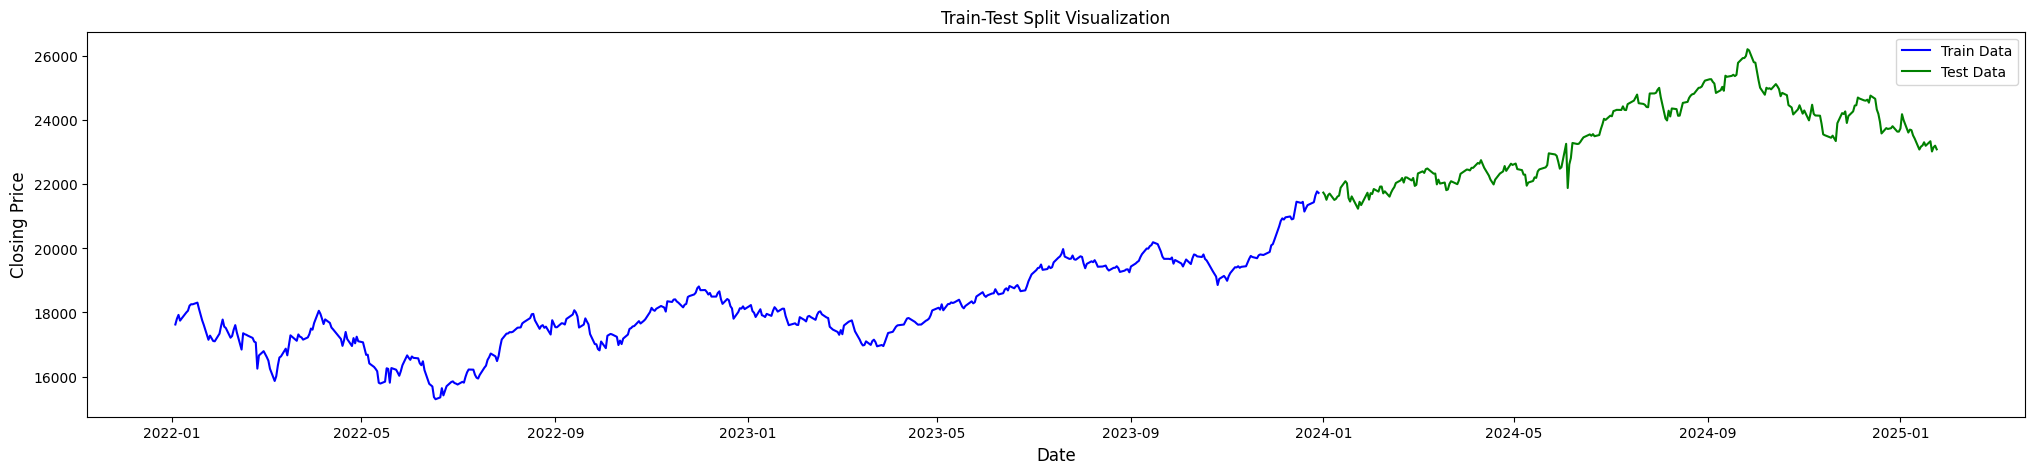

In [80]:
# Visualizing Train-Test Split
plt.figure(figsize=(25, 5))
plt.ticklabel_format(style='plain')

plt.plot(nifty_data[nifty_data['Date']<split_date]['Date'], nifty_data[nifty_data['Date']<split_date]['Close'], label='Train Data', color='blue')
plt.plot(nifty_data[nifty_data['Date']>=split_date]['Date'], nifty_data[nifty_data['Date']>=split_date]['Close'], label='Test Data', color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Train-Test Split Visualization', fontsize=12)
plt.legend()
plt.show()

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 492
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            493 non-null    float64
 1   High             493 non-null    float64
 2   Low              493 non-null    float64
 3   Open             493 non-null    float64
 4   Volume           493 non-null    int64  
 5   Daily_Return     493 non-null    float64
 6   Log_Return       493 non-null    float64
 7   Price_Change     493 non-null    float64
 8   Relative_Volume  493 non-null    float64
 9   OBV              493 non-null    int64  
 10  Day_of_Week      493 non-null    int32  
 11  Month            493 non-null    int32  
 12  Day_of_Month     493 non-null    int32  
 13  Week_Num         493 non-null    int64  
 14  MA_5             493 non-null    float64
 15  MSD_5            493 non-null    float64
 16  Lagged_Close_1   493 non-null    float64
dtypes: float64(11), int32

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 493 to 756
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            264 non-null    float64
 1   High             264 non-null    float64
 2   Low              264 non-null    float64
 3   Open             264 non-null    float64
 4   Volume           264 non-null    int64  
 5   Daily_Return     264 non-null    float64
 6   Log_Return       264 non-null    float64
 7   Price_Change     264 non-null    float64
 8   Relative_Volume  264 non-null    float64
 9   OBV              264 non-null    int64  
 10  Day_of_Week      264 non-null    int32  
 11  Month            264 non-null    int32  
 12  Day_of_Month     264 non-null    int32  
 13  Week_Num         264 non-null    int64  
 14  MA_5             264 non-null    float64
 15  MSD_5            264 non-null    float64
 16  Lagged_Close_1   264 non-null    float64
dtypes: float64(11), int

In [83]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(X_train[feats].merge(y_train , on = X_train.index).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [84]:
# X_train = X_train[feats]
# X_test = X_test[feats]

# X_train.shape, X_test.shape, len(y_train), len(y_test)

# del corr

In [85]:
scaler = MinMaxScaler()

scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

scaled_train_data.shape, scaled_test_data.shape

((493, 17), (264, 17))

In [86]:
# Preparing sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # All features except the target
        y.append(data[i + sequence_length, -1])    # Target is the next "Close" price
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(scaled_train_data, sequence_length)
X_test, y_test = create_sequences(scaled_test_data, sequence_length)

X_train.shape, X_test.shape, len(y_train), len(y_test)

((483, 10, 16), (254, 10, 16), 483, 254)

In [87]:
# Building the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Predicting
y_pred = model.predict(X_test)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0953 - val_loss: 0.4285
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0158 - val_loss: 0.0848
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0071 - val_loss: 0.0385
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059 - val_loss: 0.0543
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - val_loss: 0.0694
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0480
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - val_loss: 0.0309
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0045 - val_loss: 0.0297
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - val_loss: 0.0221
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - val_loss: 0.0177
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step 


In [88]:
y_pred.flatten().shape

(254,)

In [89]:
scaled_test_data[sequence_length:][:,-1].shape

(254,)

In [90]:
# Align scaled_test_data with the test sequences
aligned_scaled_test_data = scaled_test_data[sequence_length:]  # Skip the initial rows used in sequence creation
actual_prices = scaler.inverse_transform(aligned_scaled_test_data)[:, -1]

# Replace the last column with predictions
aligned_scaled_test_data[:, -1] = y_pred.flatten()
predicted_prices = scaler.inverse_transform(aligned_scaled_test_data)[:, -1]

In [91]:
# mse = mean_squared_error(actual_prices, predicted_prices)

# print(f"Mean Squared Error (MSE) on the test set: {mse:.2f}")

In [92]:
len(actual_prices)+sequence_length, actual_prices[0], actual_prices[-1]

(264, np.float64(21894.55078125), np.float64(23205.349609375))

In [93]:
start_date = pd.to_datetime(nifty_data[(nifty_data['Close']==actual_prices[0])]['Date'].values[0].astype('str'))
end_date = pd.to_datetime(nifty_data[(nifty_data['Close']==actual_prices[-1])]['Date'].values[0].astype('str'))
start_date, end_date

(Timestamp('2024-01-12 00:00:00'), Timestamp('2025-01-23 00:00:00'))

In [94]:
nifty_data[(nifty_data['Date'] >= start_date) & (nifty_data['Date'] <= end_date)][['Date','Close']].shape

(254, 2)

In [95]:
# Extract dates corresponding to the test data (aligned with sequence length)
# aligned_dates = nifty_data['Date'][-len(actual_prices):].reset_index(drop=True)
aligned_dates = nifty_data['Date'][(nifty_data['Date'] >= start_date) & (nifty_data['Date'] <= end_date)].reset_index(drop=True)

# Create a DataFrame
results_df = pd.DataFrame({
    'Date': aligned_dates,
    'Actual_Price': actual_prices,
    'Predicted_Price': predicted_prices
})
results_df

Date  Actual_Price  Predicted_Price
0   2024-01-12   21894.55078      21202.63138
1   2024-01-15   22097.44922      21227.59465
2   2024-01-16   22032.30078      21244.86020
3   2024-01-17   21571.94922      21206.23091
4   2024-01-18   21462.25000      21154.95184
5   2024-01-19   21622.40039      21106.82585
6   2024-01-23   21238.80078      21026.42618
7   2024-01-24   21453.94922      20983.13667
8   2024-01-25   21352.59961      20942.86881
9   2024-01-29   21737.59961      20994.44011
10  2024-01-30   21522.09961      21038.84983
11  2024-01-31   21725.69922      21033.81195
12  2024-02-01   21697.44922      21024.58312
13  2024-02-02   21853.80078      21034.90357
14  2024-02-05   21771.69922      21118.84826
15  2024-02-06   21929.40039      21217.50304
16  2024-02-07   21930.50000      21265.37933
17  2024-02-08   21717.94922      21283.20886
18  2024-02-09   21782.50000      21288.90232
19  2024-02-12   21616.05078      21316.34452
20  2024-02-13   21743.25000      21330.61394
21  2024-02-14   21840.05078      21354.81764
22  2024-02-15   21910.75000      21369.31088
23  2024-02-16   22040.69922      21378.62127
24  2024-02-19   22122.25000      21429.23316
25  2024-02-20   22196.94922      21477.73875
26  2024-02-21   22055.05078      21495.67341
27  2024-02-22   22217.44922      21517.23622
28  2024-02-23   22212.69922      21541.73100
29  2024-02-26   22122.05078      21576.46117
30  2024-02-27   22198.34961      21625.40511
31  2024-02-28   21951.15039      21648.82373
32  2024-02-29   21982.80078      21644.21685
33  2024-03-01   22338.75000      21654.29184
34  2024-03-04   22405.59961      21678.89446
35  2024-03-05   22356.30078      21707.53148
36  2024-03-06   22474.05078      21731.55583
37  2024-03-07   22493.55078      21754.83722
38  2024-03-11   22332.65039      21822.22530
39  2024-03-12   22335.69922      21844.09464
40  2024-03-13   21997.69922      21819.01772
41  2024-03-14   22146.65039      21779.62539
42  2024-03-15   22023.34961      21713.67566
43  2024-03-18   22055.69922      21749.91879
44  2024-03-19   21817.44922      21716.01350
45  2024-03-20   21839.09961      21684.11904
46  2024-03-21   22011.94922      21661.57092
47  2024-03-22   22096.75000      21631.49053
48  2024-03-26   22004.69922      21608.50793
49  2024-03-27   22123.65039      21601.38385
50  2024-03-28   22326.90039      21612.39004
51  2024-04-01   22462.00000      21724.59835
52  2024-04-02   22453.30078      21825.12982
53  2024-04-03   22434.65039      21850.81902
54  2024-04-04   22514.65039      21863.79080
55  2024-04-05   22513.69922      21876.02891
56  2024-04-08   22666.30078      21971.79927
57  2024-04-09   22642.75000      22064.64964
58  2024-04-10   22753.80078      22106.53057
59  2024-04-12   22519.40039      22092.48265
60  2024-04-15   22272.50000      22113.37866
61  2024-04-16   22147.90039      22070.36669
62  2024-04-18   21995.84961      21982.91562
63  2024-04-19   22147.00000      21894.59172
64  2024-04-22   22336.40039      21916.44714
65  2024-04-23   22368.00000      21950.67210
66  2024-04-24   22402.40039      21936.32808
67  2024-04-25   22570.34961      21908.36752
68  2024-04-26   22419.94922      21872.57163
69  2024-04-29   22643.40039      21946.52212
70  2024-04-30   22604.84961      21976.73858
71  2024-05-02   22648.19922      22000.17730
72  2024-05-03   22475.84961      22010.66435
73  2024-05-06   22442.69922      22098.19351
74  2024-05-07   22302.50000      22113.96389
75  2024-05-08   22302.50000      22109.73196
76  2024-05-09   21957.50000      22058.20744
77  2024-05-10   22055.19922      22007.46837
78  2024-05-13   22104.05078      22021.58511
79  2024-05-14   22217.84961      22008.39995
80  2024-05-15   22200.55078      21983.80777
81  2024-05-16   22403.84961      21975.49931
82  2024-05-17   22466.09961      21960.31029
83  2024-05-21   22529.05078      21960.07759
84  2024-05-22   22597.80078      21969.11199
85  2024-05-23   22967.65039      21998.56076
86  2024

In [96]:
results_df['diff'] = results_df['Actual_Price'] - results_df['Predicted_Price']

In [97]:
results_df['diff'].mean()

np.float64(762.2368868274915)

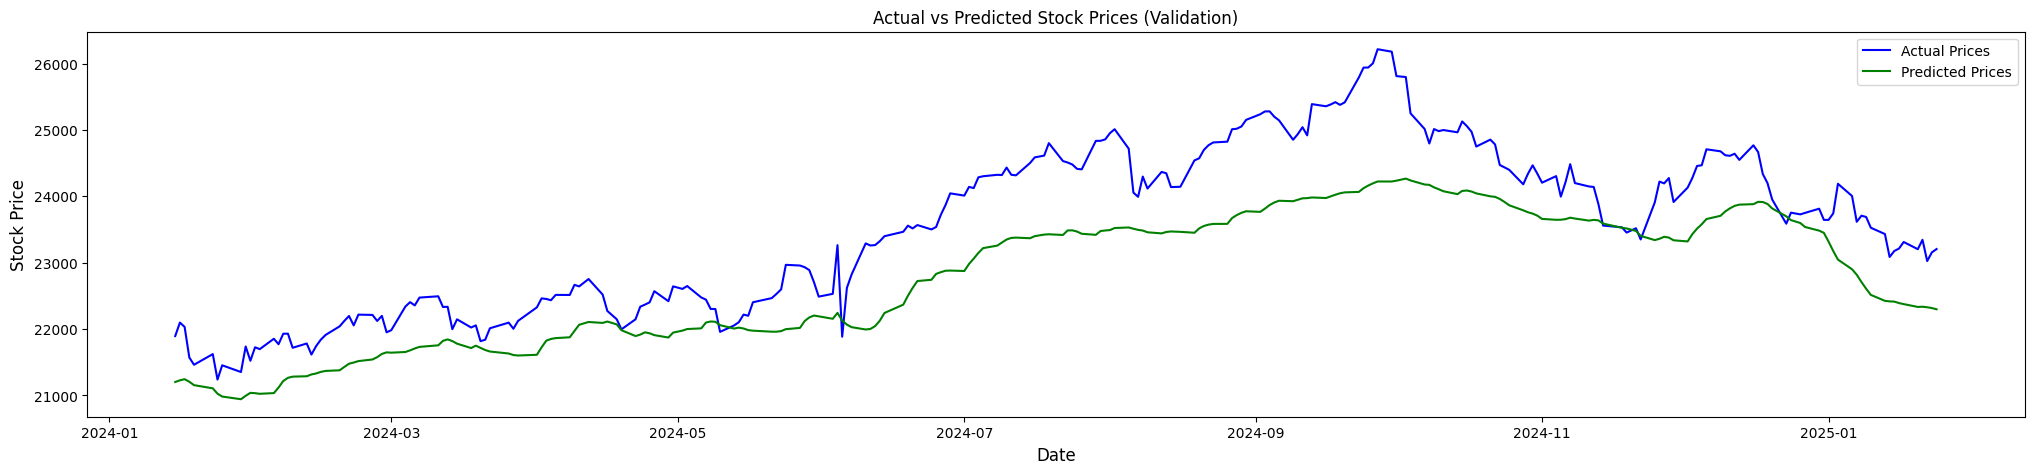

In [98]:
# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(25, 5))
plt.ticklabel_format(style='plain')

plt.plot(nifty_data['Date'][-len(actual_prices):], actual_prices, label='Actual Prices', color='blue')
plt.plot(nifty_data['Date'][-len(predicted_prices):], predicted_prices, label='Predicted Prices', color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Actual vs Predicted Stock Prices (Validation)', fontsize=12)
plt.legend()
plt.show()

In [99]:
#scaled_test_data[-sequence_length:, :-1].shape
#np.expand_dims(scaled_test_data[-sequence_length:, :-1], axis=0)

#pd.date_range(nifty_data['Date'].iloc[-2] + pd.Timedelta(days=1), periods=1)

In [125]:
next_day = str(nifty_data['Date'].iloc[-1].date())
next_day

'2025-01-24'

In [126]:
# Use the last 'sequence_length' rows from the test data
last_sequence = scaled_test_data[-sequence_length:, :-1]  # Use all features except the target

# Reshape the sequence for the LSTM model
input_sequence = np.expand_dims(last_sequence, axis=0)  # Shape (1, sequence_length, num_features)

# Predict the next value
predicted_price_scaled = model.predict(input_sequence)[0, 0]  # Get the scalar prediction

# Prepare for inverse transformation
next_day_scaled = np.zeros((1, scaled_test_data.shape[1]))
next_day_scaled[0, -1] = predicted_price_scaled  # Set the target column

# Perform inverse transformation
next_day_price = scaler.inverse_transform(next_day_scaled)[0, -1]

# Output the result
print(f"The predicted stock price for the next day - {next_day} is: {next_day_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The predicted stock price for the next day - 2025-01-24 is: 22269.84


In [127]:
# Initialize the sequence with the last 'sequence_length' rows from the test data
future_sequence = scaled_test_data[-sequence_length:, :-1]  # Use all features except the target

# Placeholder for future predictions
future_predictions = []

# Predict for the next 30 days
for _ in range(30):
    # Reshape the sequence for the LSTM model
    input_sequence = np.expand_dims(future_sequence, axis=0)  # Shape (1, sequence_length, num_features)
    
    # Predict the next value
    predicted_price = model.predict(input_sequence)[0, 0]  # Get the scalar prediction
    
    # Append the prediction
    future_predictions.append(predicted_price)
    
    # Update the sequence: remove the first row and add the predicted value as the last row
    next_row = np.append(future_sequence[-1, 1:], predicted_price)  # Slide the window forward
    future_sequence = np.vstack((future_sequence[1:], next_row))  # Update sequence

# Inverse transform to get actual prices
future_predictions_scaled = np.zeros((len(future_predictions), scaled_test_data.shape[1]))
future_predictions_scaled[:, -1] = future_predictions  # Fill only the last column (target feature)

# Perform inverse transformation
future_prices = scaler.inverse_transform(future_predictions_scaled)[:, -1]

# Create dates for the next 30 days
last_date = nifty_data['Date'].iloc[-2]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 31)]

# Create a DataFrame for the predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_prices
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [128]:
future_df

Date  Predicted_Price
0  2025-01-24      22269.83705
1  2025-01-25      22252.66350
2  2025-01-26      22073.48845
3  2025-01-27      21947.10195
4  2025-01-28      21589.10980
5  2025-01-29      21189.66695
6  2025-01-30      20707.39343
7  2025-01-31      20276.33753
8  2025-02-01      20082.39944
9  2025-02-02      19875.01180
10 2025-02-03      19656.56155
11 2025-02-04      19518.02042
12 2025-02-05      19406.93542
13 2025-02-06      19350.98762
14 2025-02-07      19385.61459
15 2025-02-08      19456.84186
16 2025-02-09      19553.53452
17 2025-02-10      19637.55691
18 2025-02-11      19750.17419
19 2025-02-12      20013.73924
20 2025-02-13      20233.63325
21 2025-02-14      20375.96370
22 2025-02-15      20453.59104
23 2025-02-16      20428.18402
24 2025-02-17      20364.91307
25 2025-02-18      20207.13770
26 2025-02-19      20032.39830
27 2025-02-20      19861.60361
28 2025-02-21      19703.63265
29 2025-02-22      19575.59250

In [136]:
fut_start = str(nifty_data['Date'].iloc[-1].date())
fut_end = str(future_df['Date'].iloc[-1].date())

fut_start, fut_end

('2025-01-24', '2025-02-22')

In [138]:
nifty_future = yf.download('^NSEI', start=fut_start, end=fut_end)

nifty_future.reset_index(inplace=True)
nifty_future.columns = nifty_future.columns.droplevel(1)

nifty_future

[*********************100%***********************]  1 of 1 completed


Price       Date       Close        High         Low        Open  Volume
0     2025-01-24 23092.19922 23347.30078 23050.00000 23183.90039  264300
1     2025-01-28 22957.25000 23137.94922 22857.65039 22960.44922       0

In [139]:
dec_dates = nifty_future['Date'].values

future_df = future_df[future_df['Date'].isin(dec_dates)]

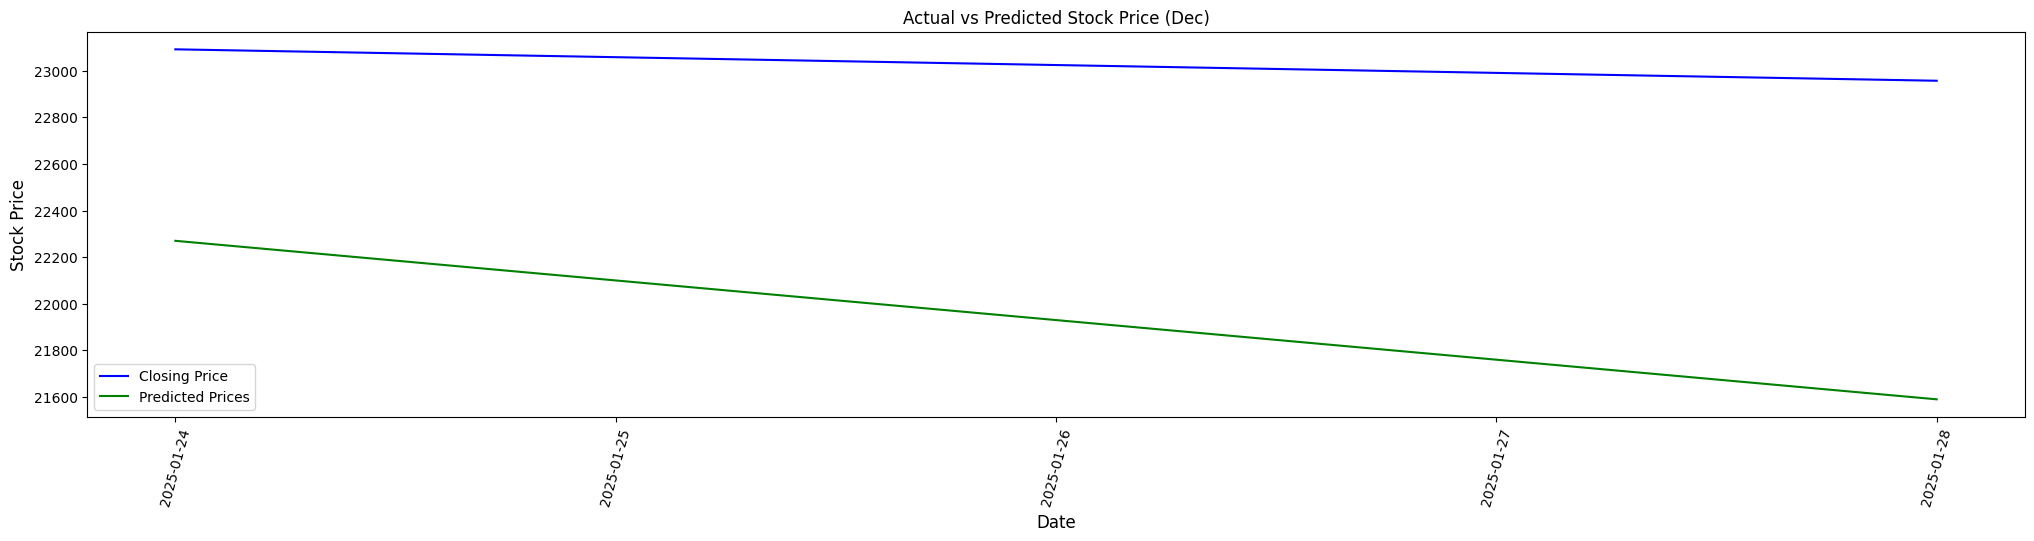

In [140]:
# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(25, 5))
plt.ticklabel_format(style='plain')

plt.plot(nifty_future['Date'], nifty_future['Close'], label='Closing Price', color='blue')
plt.plot(future_df['Date'], future_df['Predicted_Price'], label='Predicted Prices', color='green')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=75)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Actual vs Predicted Stock Price (Dec)', fontsize=12)
plt.legend()
plt.show()

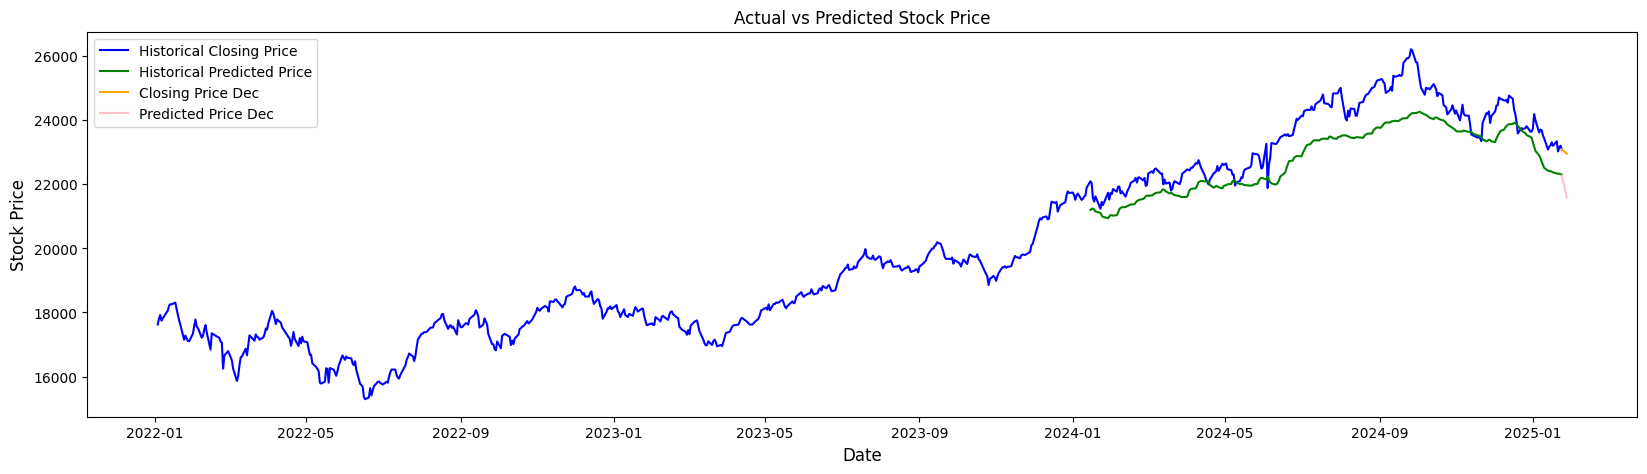

In [141]:
# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')

plt.plot(nifty_data['Date'], nifty_data['Close'], label='Historical Closing Price', color='blue')
plt.plot(nifty_data['Date'][-len(predicted_prices):], predicted_prices, label='Historical Predicted Price', color='green')
plt.plot(nifty_future['Date'], nifty_future['Close'], label='Closing Price Dec', color='orange')
plt.plot(future_df['Date'], future_df['Predicted_Price'], label='Predicted Price Dec', color='pink')

#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#plt.xticks(rotation=75)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Actual vs Predicted Stock Price', fontsize=12)
plt.legend()
plt.show()

In [142]:
%whos DataFrame

Variable       Type         Data/Info
-------------------------------------
future_df      DataFrame            Date  Predicted_P<...>25-01-28      21589.10980
nifty_data     DataFrame    Price       Date       Cl<...>\n756       23205.34961  
nifty_dec      DataFrame    Price       Date       Cl<...>30078 23796.90039  364900
nifty_future   DataFrame    Price       Date       Cl<...>65039 22960.44922       0
results_df     DataFrame              Date  Actual_Pr<...>   22297.88807  907.46154
test_data      DataFrame    Price       Close        <...>1.47818     23205.34961  
train_data     DataFrame    Price       Close        <...>6.93105     21778.69922  
